<a href="https://colab.research.google.com/github/OfTheByteQuest/Data-Analytics-Learning-and-Projects/blob/main/Chapter-4/Chapter_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/OfTheByteQuest/Data-Analytics-Learning-and-Projects.git

%cd Data-Analytics-Learning-and-Projects

Cloning into 'Data-Analytics-Learning-and-Projects'...
remote: Enumerating objects: 160, done.
remote: Counting objects: 100% (160/160), done.
remote: Compressing objects: 100% (113/113), done.
remote: Total 160 (delta 38), reused 150 (delta 34), pack-reused 0 (from 0)
Receiving objects: 100% (160/160), 3.67 MiB | 5.66 MiB/s, done.
Resolving deltas: 100% (38/38), done.
/content/Data-Analytics-Learning-and-Projects


In [ ]:
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = 'all'

In [2]:
from matplotlib_inline.backend_inline import set_matplotlib_formats, select_figure_formats
from IPython import get_ipython

set_matplotlib_formats('retina')
select_figure_formats(shell=get_ipython(), formats="svg")

# Aggrgating Pandas DataFrames

In [3]:
# Importing mandatory lib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Querying and Merging DataFrames

In [ ]:
weather =  pd.read_csv("/content/Data-Analytics-Learning-and-Projects/Chapter-4/Data/nyc_weather_2018.csv")
weather.head()

,date,datatype,station,attributes,value
0,2018-01-01T00:00:00,PRCP,GHCND:US1CTFR0039,",,N,",0.0
1,2018-01-01T00:00:00,PRCP,GHCND:US1NJBG0015,",,N,",0.0
2,2018-01-01T00:00:00,SNOW,GHCND:US1NJBG0015,",,N,",0.0
3,2018-01-01T00:00:00,PRCP,GHCND:US1NJBG0017,",,N,",0.0
4,2018-01-01T00:00:00,SNOW,GHCND:US1NJBG0017,",,N,",0.0


In [ ]:
snow_data = weather.query('datatype == "SNOW" and value > 0')
snow_data.head(), snow_data.shape

(                    date datatype            station attributes  value
 114  2018-01-01T00:00:00     SNOW  GHCND:US1NYWC0019       ,,N,   25.0
 699  2018-01-04T00:00:00     SNOW  GHCND:US1NJBG0015       ,,N,  229.0
 702  2018-01-04T00:00:00     SNOW  GHCND:US1NJBG0017       ,,N,   10.0
 706  2018-01-04T00:00:00     SNOW  GHCND:US1NJBG0018       ,,N,   46.0
 713  2018-01-04T00:00:00     SNOW  GHCND:US1NJES0018       ,,N,   10.0,
 (639, 5))

In [ ]:
station_info = pd.read_csv("/content/Data-Analytics-Learning-and-Projects/Chapter-4/Data/weather_stations.csv")
station_info.head(), station_info.shape

(                  id                           name   latitude  longitude  \
 0  GHCND:US1CTFR0022        STAMFORD 2.6 SSW, CT US  41.064100 -73.577000   
 1  GHCND:US1CTFR0039          STAMFORD 4.2 S, CT US  41.037788 -73.568176   
 2  GHCND:US1NJBG0001      BERGENFIELD 0.3 SW, NJ US  40.921298 -74.001983   
 3  GHCND:US1NJBG0002  SADDLE BROOK TWP 0.6 E, NJ US  40.902694 -74.083358   
 4  GHCND:US1NJBG0003           TENAFLY 1.3 W, NJ US  40.914670 -73.977500   
 
    elevation  
 0       36.6  
 1        6.4  
 2       20.1  
 3       16.8  
 4       21.6  ,
 (279, 5))

In [ ]:
station_info.id.describe()

,id
count,279
unique,279
top,GHCND:USW00094789
freq,1


In [ ]:
weather.station.describe()

,station
count,78780
unique,110
top,GHCND:USW00094789
freq,4270


In [ ]:
def get_row_count(*dfs):
  return [df.shape[0] for df in dfs]

In [ ]:
get_row_count(station_info, weather)

[279, 78780]

In [ ]:
def get_info(attr: str, *dfs):
  return list(map(lambda df: getattr(df, attr), dfs))

In [ ]:
get_info('shape', station_info, weather)

[(279, 5), (78780, 5)]

#### Merge or Join in Pandas

The `merge()` method in pandas allows you to combine two DataFrames based on one or more common columns or indices, similar to SQL-style joins. This function is essential for integrating datasets and aligning data for analysis.

**Key Parameters of `merge()`:**

- **`right`**: The DataFrame to merge with the caller.
- **`how`**: Specifies the type of merge to perform:
  - `'left'`: All rows from the left DataFrame and matching rows from the right.
  - `'right'`: All rows from the right DataFrame and matching rows from the left.
  - `'outer'`: All rows from both DataFrames, with `NaN` where there are no matches.
  - `'inner'`: Only rows with matching keys in both DataFrames.
  - `'cross'`: Cartesian product of both DataFrames.
- **`on`**: Column or index level names to join on. If not specified, and other join keys are not provided, it defaults to the intersection of the columns in both DataFrames.
- **`left_on`** and **`right_on`**: Specific columns or index levels from the left and right DataFrames to join on.
- **`left_index`** and **`right_index`**: If `True`, use the index (row labels) from the left or right DataFrame as the join key(s).
- **`suffixes`**: A tuple of string suffixes to apply to overlapping column names in the left and right side, respectively.

**Examples:**

1. **Inner Join on a Common Column:**

   ```python
   import pandas as pd

   df1 = pd.DataFrame({
       'ID': [1, 2, 3],
       'Name': ['Alice', 'Bob', 'Charlie']
   })

   df2 = pd.DataFrame({
       'ID': [1, 2, 4],
       'Age': [24, 27, 22]
   })

   merged_df = pd.merge(df1, df2, on='ID', how='inner')
   print(merged_df)
   ```


   **Output:**

   ```
      ID    Name  Age
   0   1   Alice   24
   1   2     Bob   27
   ```


   This merges the two DataFrames on the 'ID' column, including only rows with matching 'ID' values.

2. **Left Join with Different Column Names:**

   ```python
   df1 = pd.DataFrame({
       'EmployeeID': [1, 2, 3],
       'Name': ['Alice', 'Bob', 'Charlie']
   })

   df2 = pd.DataFrame({
       'ID': [1, 2, 4],
       'Age': [24, 27, 22]
   })

   merged_df = pd.merge(df1, df2, left_on='EmployeeID', right_on='ID', how='left')
   print(merged_df)
   ```


   **Output:**

   ```
      EmployeeID     Name   ID   Age
   0           1    Alice  1.0  24.0
   1           2      Bob  2.0  27.0
   2           3  Charlie  NaN   NaN
   ```


   Here, the merge is performed where 'EmployeeID' from `df1` matches 'ID' from `df2`. Rows in `df1` without a corresponding 'ID' in `df2` have `NaN` for 'ID' and 'Age'.

3. **Outer Join:**

   ```python
   df1 = pd.DataFrame({
       'ID': [1, 2, 3],
       'Name': ['Alice', 'Bob', 'Charlie']
   })

   df2 = pd.DataFrame({
       'ID': [2, 3, 4],
       'Age': [30, 25, 22]
   })

   merged_df = pd.merge(df1, df2, on='ID', how='outer', suffixes=('_left', '_right'))
   print(merged_df)
   ```


   **Output:**

   ```
      ID     Name  Age
   0   1    Alice  NaN
   1   2      Bob  30.0
   2   3  Charlie  25.0
   3   4      NaN  22.0
   ```


   This outer join includes all rows from both DataFrames, with `NaN` where there are no matches.

**Considerations:**

- When merging on columns with the same name, specify the `on` parameter. If the column names differ, use `left_on` and `right_on`.
- Use the `suffixes` parameter to distinguish overlapping column names from the left and right DataFrames.
- Be mindful of the `how` parameter to control the type of join, as it determines which rows are included in the resulting DataFrame.

For more detailed information, refer to the [pandas documentation on merging](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).

***Explanation:*** Since, from previous outputs we know that there are in total 279 unique stations for which we have data in *stations* dataframe for which we have data, but, in *weather* dataframe only, 110 of them appears so, by performing the inner join on them, we will get a dataframe in which only info of all the stations for which we have info will be present along with other info in the *weather* dataframe.

In [ ]:
# Inner_join dataframe contains all the rows which have common values of
# station in both the dataframes. Since, weather dataframe has multiple values
# the values of columns in the station dataframe, will be repeated for the
# rows where the 'key' values matches.


inner_join = weather.merge(
    station_info, left_on = 'station', right_on = 'id', how='inner'
)
inner_join.sample(5, random_state=0), inner_join.shape

(                      date datatype            station attributes  value  \
 10739  2018-02-17T00:00:00     PRCP  GHCND:USC00066655   ,,7,0700    4.1   
 45188  2018-07-27T00:00:00     SNOW  GHCND:US1NJES0019       ,,N,    0.0   
 59823  2018-10-05T00:00:00     PRCP  GHCND:US1NJES0024       ,,N,    0.0   
 10852  2018-02-17T00:00:00     TMIN  GHCND:USW00094789   ,,W,2400   -2.1   
 46755  2018-08-03T00:00:00     AWND  GHCND:USW00094745       ,,W,    1.8   
 
                       id                              name   latitude  \
 10739  GHCND:USC00066655                PUTNAM LAKE, CT US  41.082500   
 45188  GHCND:US1NJES0019   WEST CALDWELL TWP 1.3 NE, NJ US  40.861500   
 59823  GHCND:US1NJES0024      CEDAR GROVE TWP 0.4 W, NJ US  40.855695   
 10852  GHCND:USW00094789  JFK INTERNATIONAL AIRPORT, NY US  40.639150   
 46755  GHCND:USW00094745     WESTCHESTER CO AIRPORT, NY US  41.062360   
 
        longitude  elevation  
 10739 -73.638600       91.4  
 45188 -74.277500       81.4

In [ ]:
# To produce the same result as the last one.
weather.merge(
    station_info.rename({'id':'station'}, axis=1),
    on='station',
    how='inner'
).sample(
    5, random_state=0
)

,date,datatype,station,attributes,value,name,latitude,longitude,elevation
10739,2018-02-17T00:00:00,PRCP,GHCND:USC00066655,",,7,0700",4.1,"PUTNAM LAKE, CT US",41.082500,-73.638600,91.4
45188,2018-07-27T00:00:00,SNOW,GHCND:US1NJES0019,",,N,",0.0,"WEST CALDWELL TWP 1.3 NE, NJ US",40.861500,-74.277500,81.4
59823,2018-10-05T00:00:00,PRCP,GHCND:US1NJES0024,",,N,",0.0,"CEDAR GROVE TWP 0.4 W, NJ US",40.855695,-74.235564,108.5
10852,2018-02-17T00:00:00,TMIN,GHCND:USW00094789,",,W,2400",-2.1,"JFK INTERNATIONAL AIRPORT, NY US",40.639150,-73.764010,3.4
46755,2018-08-03T00:00:00,AWND,GHCND:USW00094745,",,W,",1.8,"WESTCHESTER CO AIRPORT, NY US",41.062360,-73.704630,111.9


In [ ]:
left_join = station_info.merge(
    weather,
    left_on = 'id',
    right_on = 'station',
    how = 'left'
)

right_join = weather.merge(
    station_info,
    left_on = 'station',
    right_on = 'id',
    how = 'right'
)

outer_join = weather.merge(
    station_info[station_info.name.str.contains('NY')],
    left_on='station',
    right_on='id',
    how='outer',
    indicator=True
)

***Explanation:*** The difference in counts of rows in inner_join dataframe and left_join, right_join and outer_join dataframes as, inner join only contains rows where values of 'id' and 'station' columns matched whereas, that's not the
case in the other datafrmes. Also, since, left_join and right_join, dataframes contains rows of all the values of 'station' columns but, not of 'id' columns, outer_join dataframe have more rows in it.

In [ ]:
get_info("shape", inner_join, left_join, right_join, outer_join)

[(78780, 10), (78949, 10), (78949, 10), (78852, 11)]

In [ ]:
pd.concat([outer_join.sample(4, random_state=0),
          outer_join[outer_join.station.isna()].head(2)], axis=0)

,date,datatype,station,attributes,value,id,name,latitude,longitude,elevation,_merge
74838,2018-01-23T00:00:00,AWND,GHCND:USW00094789,",,W,",6.3,GHCND:USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",40.639150,-73.764010,3.4,both
19325,2018-03-29T00:00:00,SNOW,GHCND:US1NJPS0012,",,N,",0.0,NaN,NaN,NaN,NaN,NaN,left_only
66828,2018-08-09T00:00:00,WT01,GHCND:USW00094728,",,W,",1.0,GHCND:USW00094728,"NY CITY CENTRAL PARK, NY US",40.778980,-73.969250,42.7,both
67039,2018-08-28T00:00:00,WSF2,GHCND:USW00094728,",,W,",5.4,GHCND:USW00094728,"NY CITY CENTRAL PARK, NY US",40.778980,-73.969250,42.7,both
14527,NaN,NaN,NaN,NaN,NaN,GHCND:US1NJMS0036,"PARSIPPANY TROY HILLS TWP 2.1 E, NJ US",40.865600,-74.385100,64.3,right_only
14528,NaN,NaN,NaN,NaN,NaN,GHCND:US1NJMS0039,"PARSIPPANY TROY HILLS TWP 1.3 WSW, NJ US",40.853314,-74.446957,94.2,right_only


In [ ]:
dirty_data = pd.read_csv(
    filepath_or_buffer = "/content/Data-Analytics-Learning-and-Projects/Chapter-4/Data/dirty_data.csv",
    index_col = 'date'
).drop_duplicates().drop(columns='SNWD')

In [ ]:
dirty_data.head()
dirty_data.shape
dirty_data.station.value_counts()
dirty_data.index.nunique()

,station,PRCP,SNOW,TMAX,TMIN,TOBS,WESF,inclement_weather
date,,,,,,,,
2018-01-01T00:00:00,?,0.0,0.0,5505.0,-40.0,NaN,NaN,NaN
2018-01-02T00:00:00,GHCND:USC00280907,0.0,0.0,-8.3,-16.1,-12.2,NaN,False
2018-01-03T00:00:00,GHCND:USC00280907,0.0,0.0,-4.4,-13.9,-13.3,NaN,False
2018-01-04T00:00:00,?,20.6,229.0,5505.0,-40.0,NaN,19.3,True
2018-01-05T00:00:00,?,0.3,NaN,5505.0,-40.0,NaN,NaN,NaN


(309, 8)

,count
station,
GHCND:USC00280907,247
?,62


259

In [ ]:
valid_station = dirty_data.query(
    'station != "?"'
).copy().drop(columns=['WESF', 'station'])
station_with_wesf = dirty_data.query(
    'station == "?"'
).copy().drop(columns=['station', 'TOBS', 'TMIN', 'TMAX'])

In [ ]:
resultant_df = valid_station.merge(
    station_with_wesf,
    left_index = True,
    right_index = True,
    how='inner',
    suffixes=('', '_?')
)
resultant_df.query('WESF > 0').head()
resultant_df.shape

,PRCP,SNOW,TMAX,TMIN,TOBS,inclement_weather,PRCP_?,SNOW_?,WESF,inclement_weather_?
date,,,,,,,,,,
2018-01-30T00:00:00,0.0,0.0,6.7,-1.7,-0.6,False,1.5,13.0,1.8,True
2018-03-08T00:00:00,48.8,NaN,1.1,-0.6,1.1,False,28.4,NaN,28.7,NaN
2018-03-13T00:00:00,4.1,51.0,5.6,-3.9,0.0,True,3.0,13.0,3.0,True
2018-03-21T00:00:00,0.0,0.0,2.8,-2.8,0.6,False,6.6,114.0,8.6,True
2018-04-02T00:00:00,9.1,127.0,12.8,-1.1,-1.1,True,14.0,152.0,15.2,True


(50, 10)

In [ ]:
# To produce the same result as the last one using `.join() method`
valid_station.join(
    station_with_wesf,
    rsuffix = "_?"
).query('WESF > 0').head()

,PRCP,SNOW,TMAX,TMIN,TOBS,inclement_weather,PRCP_?,SNOW_?,WESF,inclement_weather_?
date,,,,,,,,,,
2018-01-30T00:00:00,0.0,0.0,6.7,-1.7,-0.6,False,1.5,13.0,1.8,True
2018-03-08T00:00:00,48.8,NaN,1.1,-0.6,1.1,False,28.4,NaN,28.7,NaN
2018-03-13T00:00:00,4.1,51.0,5.6,-3.9,0.0,True,3.0,13.0,3.0,True
2018-03-21T00:00:00,0.0,0.0,2.8,-2.8,0.6,False,6.6,114.0,8.6,True
2018-04-02T00:00:00,9.1,127.0,12.8,-1.1,-1.1,True,14.0,152.0,15.2,True


***Note:*** The `.join()` method always uses index column to join dataframes but, can use any column from the right dataframe if provided as the value of `on` parameter.

#### Set Operations

In [ ]:
weather.set_index('station', inplace=True)
station_info.set_index('id', inplace=True)

weather.index.intersection(station_info.index)

Index(['GHCND:US1CTFR0039', 'GHCND:US1NJBG0015', 'GHCND:US1NJBG0017',
       'GHCND:US1NJBG0018', 'GHCND:US1NJBG0023', 'GHCND:US1NJBG0030',
       'GHCND:US1NJBG0039', 'GHCND:US1NJBG0044', 'GHCND:US1NJES0018',
       'GHCND:US1NJES0024',
       ...
       'GHCND:US1NJBG0037', 'GHCND:USC00284987', 'GHCND:US1NJES0031',
       'GHCND:US1NJES0029', 'GHCND:US1NJMD0086', 'GHCND:US1NJMS0097',
       'GHCND:US1NJMN0081', 'GHCND:US1NJMD0088', 'GHCND:US1NJES0040',
       'GHCND:US1NYQN0029'],
      dtype='object', length=110)

In [ ]:
weather.index.difference(station_info.index)

RangeIndex(start=0, stop=279, step=1)

In [ ]:
station_info.index.difference(weather.index)

Index(['GHCND:US1CTFR0022', 'GHCND:US1NJBG0001', 'GHCND:US1NJBG0002',
       'GHCND:US1NJBG0005', 'GHCND:US1NJBG0006', 'GHCND:US1NJBG0008',
       'GHCND:US1NJBG0011', 'GHCND:US1NJBG0012', 'GHCND:US1NJBG0013',
       'GHCND:US1NJBG0020',
       ...
       'GHCND:USC00308322', 'GHCND:USC00308749', 'GHCND:USC00308946',
       'GHCND:USC00309117', 'GHCND:USC00309270', 'GHCND:USC00309400',
       'GHCND:USC00309466', 'GHCND:USC00309576', 'GHCND:USW00014708',
       'GHCND:USW00014786'],
      dtype='object', length=169)

In [ ]:
weather.index.unique().union(station_info.index)

Index(['GHCND:US1CTFR0022', 'GHCND:US1CTFR0039', 'GHCND:US1NJBG0001',
       'GHCND:US1NJBG0002', 'GHCND:US1NJBG0003', 'GHCND:US1NJBG0005',
       'GHCND:US1NJBG0006', 'GHCND:US1NJBG0008', 'GHCND:US1NJBG0010',
       'GHCND:US1NJBG0011',
       ...
       'GHCND:USW00014708', 'GHCND:USW00014732', 'GHCND:USW00014734',
       'GHCND:USW00014786', 'GHCND:USW00054743', 'GHCND:USW00054787',
       'GHCND:USW00094728', 'GHCND:USW00094741', 'GHCND:USW00094745',
       'GHCND:USW00094789'],
      dtype='object', length=279)

### DataFrame Operations

In [ ]:
!head -n 1 '/content/Data-Analytics-Learning-and-Projects/Chapter-4/Data/nyc_weather_2018.csv'
!head -n 1 '/content/Data-Analytics-Learning-and-Projects/Chapter-4/Data/fb_2018.csv'

date,datatype,station,attributes,value
date,open,high,low,close,volume


In [ ]:
weather = pd.read_csv(
    '/content/Data-Analytics-Learning-and-Projects/Chapter-4/Data/nyc_weather_2018.csv',
    parse_dates = ['date']
)

fb = pd.read_csv(
    '/content/Data-Analytics-Learning-and-Projects/Chapter-4/Data/fb_2018.csv',
    index_col='date',
    parse_dates = True
)

#### Airthmatic and Statistics

##### Pandas Airthmatic functions

Pandas provide several method to perform airthmatic operations on `DataFrames` and `Series` objects, like `.sub()` or `div()` methods. These operations can be performed with the use of mathematical operators and with the ability of `numpy` to vecotrize these operations and broadcating, they might produce the same effects with certain differes which being:

###### **1. Handling of Different Indexes (Alignment)**  
- Pandas arithmetic methods like `.add()`, `.sub()`, `.div()`, etc., **automatically align indexes** before performing operations.  
- Arithmetic operators (`+`, `-`, `*`, `/`) do not align indexes, which may lead to mismatched computations or NaN values.  

**Example:**  
```python
s1 = pd.Series([10, 20, 30], index=['a', 'b', 'c'])
s2 = pd.Series([1, 2, 3], index=['b', 'c', 'd'])
print(s1 - s2)  # Automatic index alignment
```
**Output:**  
```
a    NaN
b   18.0
c   28.0
d    NaN
dtype: float64
```
If using NumPy, the operation would ignore indexes and only perform element-wise subtraction.

---

###### **2. Handling Missing Values (`fill_value` Parameter)**  
- Pandas methods provide a `fill_value` parameter to replace NaNs before computation.  
- Arithmetic operators will propagate NaN values, leading to missing results.  

**Example:**  
```python
s1 = pd.Series([10, 20, 30], index=['a', 'b', 'c'])
s2 = pd.Series([1, 2, 3], index=['b', 'c', 'd'])
print(s1.sub(s2, fill_value=0))  # Replaces NaN with 0
```
**Output:**  
```
a   10.0  # s1['a'] - 0 (fill value)
b   18.0  # s1['b'] - s2['b']
c   28.0  # s1['c'] - s2['c']
d   -3.0  # 0 (fill value) - s2['d']
dtype: float64
```
Using `-` directly would result in NaN for unmatched indexes.

---

###### **3. Operations Between Different Data Structures**  
- Using arithmetic operators on DataFrames and Series can sometimes lead to broadcasting issues.  
- Pandas arithmetic methods allow explicit row-wise or column-wise operations using the `axis` parameter.  

**Example (Row-wise Operation with Series):**  
```python
df = pd.DataFrame({'A': [10, 20, 30], 'B': [40, 50, 60]})
s = pd.Series([1, 2, 3])  # No column labels
print(df.sub(s, axis=0))  # Explicit row-wise broadcasting
```
**Output:**  
```
    A   B
0   9  39
1  18  48
2  27  57
```
Arithmetic operators do not explicitly specify how broadcasting should happen.

---

###### **4. Readability and Maintainability**  
- Using `df.sub()`, `df.div()`, etc., makes the **operation’s intent clearer**.  
- It avoids confusion when dealing with different data structures and handling NaNs.  

**Comparison:**  
```python
df1.sub(df2, fill_value=0)  # Clearly handles missing values
df1 - df2  # Less explicit handling of missing values
```

---

###### **Comparison Table**  

| Feature | Arithmetic Operators (`+`, `-`, `*`, `/`) | Pandas Methods (`add()`, `sub()`, `div()`, etc.) |
|---------|--------------------------------|--------------------------------|
| **Index Alignment** | No automatic alignment | Auto-aligned by index |
| **Handling NaN Values** | NaNs propagate | `fill_value` avoids NaNs |
| **Operations on Different Shapes** | Can cause mismatches | Allows explicit broadcasting (`axis` parameter) |
| **Readability & Maintainability** | Less explicit | More explicit intent |

---

#### **When to Use Each Approach**  
- **Arithmetic operators:** When working with fully aligned Pandas objects or NumPy arrays.  
- **Pandas arithmetic methods:** When dealing with missing values, misaligned indexes, or requiring explicit broadcasting.

In [ ]:
fb.head(2)

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.58,177.55,181.42,18151903
2018-01-03,181.88,184.78,181.33,184.67,16886563


In [ ]:
fb.assign(
    abs_z_score_volume = lambda x: x.volume.sub(
        x.volume.mean()
    ).div(x.volume.std()).abs()
).query('abs_z_score_volume > 3')

,open,high,low,close,volume,abs_z_score_volume
date,,,,,,
2018-03-19,177.01,177.17,170.06,172.56,88140060,3.145078
2018-03-20,167.47,170.20,161.95,168.15,129851768,5.315169
2018-03-21,164.80,173.40,163.30,169.39,106598834,4.105413
2018-03-26,160.82,161.10,149.02,160.06,126116634,5.120845
2018-07-26,174.89,180.13,173.75,176.26,169803668,7.393705


In [ ]:
# To produce the same response as the lat one

fb.assign(
    abs_z_score_volume = lambda x: ((x.volume - x.volume.mean())/x.volume.std()).abs()
).query('abs_z_score_volume > 3')

,open,high,low,close,volume,abs_z_score_volume
date,,,,,,
2018-03-19,177.01,177.17,170.06,172.56,88140060,3.145078
2018-03-20,167.47,170.20,161.95,168.15,129851768,5.315169
2018-03-21,164.80,173.40,163.30,169.39,106598834,4.105413
2018-03-26,160.82,161.10,149.02,160.06,126116634,5.120845
2018-07-26,174.89,180.13,173.75,176.26,169803668,7.393705


##### **Axes in Pandas and NumPy**

###### **1. Introduction to Axes**
In both **Pandas** and **NumPy**, the `axis` parameter is a fundamental concept that dictates how operations are applied across data structures. It determines whether an operation is performed along rows or columns in **DataFrames**, **Series**, and **NumPy arrays**.

The concept of axes is essential for functions such as **sum(), mean(), apply(), drop(), concatenate(), and many more**.

---

###### **2. Understanding `axis=0` vs. `axis=1`**

**In Pandas (DataFrame and Series)**

| `axis` Value | Direction | Operation Applies To | Examples |
|-------------|----------|---------------------|----------|
| `axis=0` | **Vertical** | Operates on columns (affects rows) | Sum of each column, dropping rows, applying functions column-wise |
| `axis=1` | **Horizontal** | Operates on rows (affects columns) | Sum of each row, dropping columns, applying functions row-wise |

 **In NumPy (Arrays and Matrices)**

| `axis` Value | Direction | Operation Applies To | Examples |
|-------------|----------|---------------------|----------|
| `axis=0` | **Downward** | Column-wise operations | Summing along columns, finding max along columns |
| `axis=1` | **Across** | Row-wise operations | Summing along rows, finding max along rows |

---

###### **3. Axis in Pandas**

**(a) Using `axis` with the `drop()` method**

```python
import pandas as pd

df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6],
    'C': [7, 8, 9]
})

# Drop row at index 1
df_dropped_row = df.drop(1, axis=0)

# Drop column 'B'
df_dropped_column = df.drop('B', axis=1)
```

**(b) Using `axis` with aggregation functions (e.g., `sum()`)**

```python
# Sum along columns (column-wise sum)
df_sum_col = df.sum(axis=0)

# Sum along rows (row-wise sum)
df_sum_row = df.sum(axis=1)
```

**(c) Using `axis` with `apply()` for custom functions**

```python
# Find max in each column
df_max_col = df.apply(max, axis=0)

# Find max in each row
df_max_row = df.apply(max, axis=1)
```

**(d) Using `axis` in element-wise operations**

```python
s = pd.Series([10, 20, 30])

# Subtract Series from DataFrame row-wise (index alignment)
df_subtract_row = df.sub(s, axis=0)

# Subtract Series from DataFrame column-wise (broadcasting)
df_subtract_col = df.sub(s, axis=1)
```

---

###### **4. Axis in NumPy**

**(a) Using `axis` with NumPy Arrays**

```python
import numpy as np

arr = np.array([[1, 2, 3],
                [4, 5, 6],
                [7, 8, 9]])

# Sum along columns (downward)
sum_col = np.sum(arr, axis=0)

# Sum along rows (across)
sum_row = np.sum(arr, axis=1)
```

**(b) Using `axis` with NumPy's `mean()` and `max()`**

```python
mean_col = np.mean(arr, axis=0)  # Mean of each column
max_row = np.max(arr, axis=1)    # Max of each row
```

---

###### **5. Axis in Concatenation and Stacking**

**(a) In Pandas (`concat()` method)**

```python
df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
df2 = pd.DataFrame({'A': [5, 6], 'B': [7, 8]})

# Concatenating along rows (adding rows, column names remain the same)
df_concat_row = pd.concat([df1, df2], axis=0)

# Concatenating along columns (adding new columns)
df_concat_col = pd.concat([df1, df2], axis=1)
```

**(b) In NumPy (`concatenate()` function)**

```python
arr1 = np.array([[1, 2], [3, 4]])
arr2 = np.array([[5, 6], [7, 8]])

# Stack arrays vertically (rows added)
arr_stack_vert = np.concatenate((arr1, arr2), axis=0)

# Stack arrays horizontally (columns added)
arr_stack_horiz = np.concatenate((arr1, arr2), axis=1)
```

---

###### **6. Summary and Best Practices**

| Use Case | Pandas | NumPy |
|----------|--------|--------|
| **Summing values** | `df.sum(axis=0)` | `np.sum(arr, axis=0)` |
| **Dropping rows/columns** | `df.drop(..., axis=0/1)` | Not applicable |
| **Applying functions** | `df.apply(func, axis=0/1)` | `np.apply_along_axis(func, axis, arr)` |
| **Arithmetic operations** | `df.sub(s, axis=0/1)` | Element-wise broadcasting |
| **Concatenation** | `pd.concat([df1, df2], axis=0/1)` | `np.concatenate((arr1, arr2), axis=0/1)` |

###### **Best Practices:**
- Use `axis=0` when you want to **apply operations on each column (affecting rows)**.
- Use `axis=1` when you want to **apply operations on each row (affecting columns)**.
- Always check **data alignment** when performing operations across different structures.

Understanding axes helps in optimizing operations and writing efficient Pandas and NumPy code.



##### Understanding the Rank Concept in Pandas

###### Basic Definition
In pandas, the `rank()` function assigns a rank to each value in a Series or DataFrame column based on the value's relative position when arranged in order (ascending by default). Ranking works on the values themselves, not on the indexes.

###### Example Explained
Consider this example:

```python
import pandas as pd
s = pd.Series([3, 1, 4, 1, 5, 9, 2])
s.sort_values()
print(s.rank())  # Default ranking
```

This produces:
```
0    4.0
1    1.5
2    5.0
3    1.5
4    6.0
5    7.0
6    3.0
dtype: float64
```

###### Step-by-Step Explanation

1. Original Series: `[3, 1, 4, 1, 5, 9, 2]` with indexes `[0, 1, 2, 3, 4, 5, 6]`

2. When sorted: `[1, 1, 2, 3, 4, 5, 9]`

3. Rank assignment:
   - Value 3 (at index 0) → 4th smallest value → rank 4.0
   - Value 1 (at index 1) → tied for 1st/2nd smallest → average rank 1.5
   - Value 4 (at index 2) → 5th smallest value → rank 5.0
   - Value 1 (at index 3) → tied for 1st/2nd smallest → average rank 1.5
   - Value 5 (at index 4) → 6th smallest value → rank 6.0
   - Value 9 (at index 5) → 7th smallest value → rank 7.0
   - Value 2 (at index 6) → 3rd smallest value → rank 3.0

4. The output shows each original index with the rank of the value that was at that position.

###### Key Features of Rank()

1. **Tie Handling Methods**:
   - `'average'` (default): Assigns the average of the ranks to tied values
   - `'min'`: Assigns the lowest rank to all tied values
   - `'max'`: Assigns the highest rank to all tied values
   - `'first'`: Ranks assigned based on the order the values appear
   - `'dense'`: Like 'min' but with no gaps between ranks

2. **Float Output**: Ranks are returned as floats to accommodate tie-breaking strategies like 'average'

3. **Direction**: Can rank in ascending (`ascending=True`, default) or descending order (`ascending=False`)

###### Practical Applications

1. **Non-parametric Statistics**: For tests that don't assume normal distribution (Spearman correlation, Mann-Whitney, etc.)

2. **Outlier Resistance**: Rankings are immune to extreme values that might skew analyses

3. **Normalization**: Puts different datasets on a comparable scale

4. **Percentiles and Quantiles**: Foundation for understanding relative positioning of values

5. **Competition Scoring**: Many contests use ranks rather than absolute scores

###### Real-World Example

When comparing metrics across different scales (e.g., salaries across countries with different currencies), ranking can provide a meaningful way to understand relative standing regardless of the original units.

###### Common Pattern in Output

Remember that in the output:
- Left side: Original position (index) in the Series
- Right side: Rank assigned to the value that was at that position

This format sometimes creates confusion since it appears as though the ranks are assigned to indexes, when they're actually computed based on the values. But, pandas may be using this format of giving the output as, <mark>the index values will align with the original index of the dataframe when they are being added as a new column for analyses.</mark>

***Explanation:*** It can be observed that the largest percentage change in volume traded was on January 12, 2018, which was the day, Meta announced that changes to the news feed section, which was to prioritize content from user's friends over brands they follow. Since, most of the Meta's revenue comes from advertising, approximately 99% (as of Dec 31, 2023), this caused panic resulting people to sell it's stocks driving the volume traded to the highest till, Decenmber 31, 2018.

In [ ]:
fb.assign(
    volume_pct_change = fb.volume.pct_change(),
    pct_change_rank = lambda x: x.volume_pct_change.abs().rank(ascending=False)
).nsmallest(5, 'pct_change_rank')

,open,high,low,close,volume,volume_pct_change,pct_change_rank
date,,,,,,,
2018-01-12,178.06,181.48,177.40,179.37,77551299,7.087876,1.0
2018-03-19,177.01,177.17,170.06,172.56,88140060,2.611789,2.0
2018-07-26,174.89,180.13,173.75,176.26,169803668,1.628841,3.0
2018-09-21,166.64,167.25,162.81,162.93,45994800,1.428956,4.0
2018-03-26,160.82,161.10,149.02,160.06,126116634,1.352496,5.0


In [ ]:
# pd.Series.rank

In [ ]:
fb['2018-01-11':'2018-01-12']

,open,high,low,close,volume
date,,,,,
2018-01-11,188.40,188.40,187.38,187.77,9588587
2018-01-12,178.06,181.48,177.40,179.37,77551299


##### Difference between `.any()` and `.all()` method

**1. `.any()`**

`.any()` method looks in the mask, whether atleast one of the values, along the methioned axis, has `True` value. So, until none of the values along the mentioned axis has `True` value, it will give us `True`. Only if, all the values are `False`, along the axis, it will give us `False`. For, `axis = 0` (`default`), it will check divisions along the horizontal axis, which are columns, and give us the results for each column individually whereas, for `axis=1`, the checking happens along the vertical axis, and thus all the rows are examined individually.

**2. `.all()`**

`.all()` methods, in-opposite to `.any()` method, check for the presence of `True` for all the cells, along the mentioned axis and returns `True` only if, all of the cells have `True` value. Functionality, through, `axis` parameter is manipulated in the same manner as it is done in, `.any()` method.

In [ ]:
# To check whether any column has value less than 215
(fb > 215).any()
(fb > 215).all()

,0
open,False
high,False
low,False
close,False
volume,True


In [ ]:
# pd.Series.any
# pd.Series.all

#### Binning and thresholds

In [ ]:
# Confirming whether any two days have the same volume traded

(fb.volume.value_counts() > 1).sum()

np.int64(0)

In [ ]:
# Creating bins for volume traded
fb.volume.describe()['count']
fb.volume.max()
fb.volume.min()
fb.volume.max()-fb.volume.min()

160215081

In [ ]:
from scipy import stats

In [ ]:
# stats.gaussian_kde
# np.histogram_bin_edges()

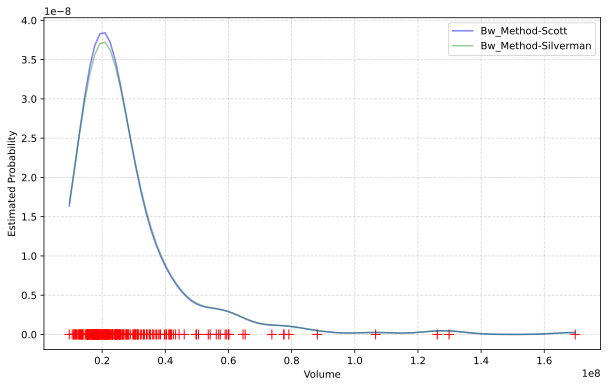

In [ ]:
# Inspecting the distribution of 'volume' to get an idea of its distribution

# Testing the result for bandwidths with calculated from different formulas.
kde_scott_volume = stats.gaussian_kde(fb.volume,)
kde_silverman_volume = stats.gaussian_kde(fb.volume, bw_method='silverman')

plt.figure(figsize=(10, 6))
plt.plot(fb.volume, np.zeros(fb.volume.shape), 'r+', ms=10)
plt.plot(np.linspace(fb.volume.min(), fb.volume.max(), 100), kde_scott_volume(np.linspace(fb.volume.min(), fb.volume.max(), 100)), color='blue', alpha=0.5, label="Bw_Method-Scott")
plt.plot(np.linspace(fb.volume.min(), fb.volume.max(), 100), kde_silverman_volume(np.linspace(fb.volume.min(), fb.volume.max(), 100)), color='green', alpha=0.4, label="Bw_Method-Silverman")
plt.xlabel("Volume")
plt.ylabel("Estimated Probability")
plt.grid(alpha=0.5, linestyle="--")
plt.legend()

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'last_expr'  # Or use 'last_expr'


***Note:*** The `hist()` method of `matplotlib` is based on  `numpy`'s `histogram_bin_edges()` function so, the values for `bins` parameter that work for `histogram_bins_edges()` function, works for `hist()` function too.

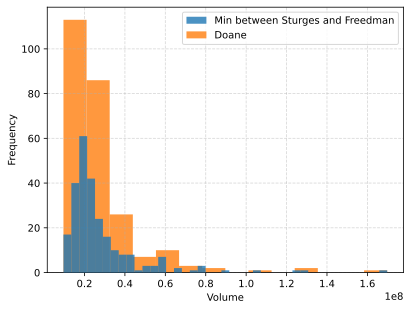

In [ ]:
# Calculating the bin sizes with different formulas for bin count

volume_bin_edges_auto = np.histogram_bin_edges(fb.volume, bins='auto')
volume_bin_edges_doane = np.histogram_bin_edges(fb.volume, bins='doane')
plt.hist(fb.volume, volume_bin_edges_auto, alpha=0.8, label='Min between Sturges and Freedman', zorder=10)
plt.hist(fb.volume, volume_bin_edges_doane, alpha=0.8, label='Doane')
plt.legend()
plt.grid(alpha=0.5,linestyle='--')
plt.xlabel("Volume")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# pd.cut

In [ ]:
# Code for binning based on my analysis- Not used further

# volume_binned = pd.cut(
#     fb.volume,
#     bins=volume_bin_edges_auto,
#     # retbins=True
# )
# volume_binned.to_frame().assign(
#     bin_rank = lambda x: x.rank(method='max')
# )

volume_binned = pd.cut(
    fb.volume,
    bins=3,
    labels=['low', 'med', 'high']
)

volume_binned.value_counts()

,count
volume,
low,240
med,8
high,3


In [ ]:
fb[volume_binned == 'high'].sort_values('volume', ascending=False)

,open,high,low,close,volume
date,,,,,
2018-07-26,174.89,180.13,173.75,176.26,169803668
2018-03-20,167.47,170.20,161.95,168.15,129851768
2018-03-26,160.82,161.10,149.02,160.06,126116634


***Explanation:*** The results obtained below are replication of crash in Meta's stocks which was depicted earlier.

In [ ]:
fb.loc['2018-07-25': '2018-07-26']

,open,high,low,close,volume
date,,,,,
2018-07-25,215.715,218.62,214.27,217.50,64592585
2018-07-26,174.890,180.13,173.75,176.26,169803668


***Explanation:*** High volume trading of the Meta's stock within the days, March 16, 2018 to March 20, 2018 is the result of another scandal which was revealed regarding Meta. The news broke out on March 16, 2018 which was Friday and it's only after when it opened again on Monday the difference in volume traded occured which continued till later on when more info about the scandal was out. The scandal was *Cambridge Analytica Scandal*.

In [ ]:
fb.loc["2018-03-16": "2018-03-20"]

,open,high,low,close,volume
date,,,,,
2018-03-16,184.49,185.33,183.41,185.09,24403438
2018-03-19,177.01,177.17,170.06,172.56,88140060
2018-03-20,167.47,170.20,161.95,168.15,129851768


In [ ]:
fb.loc["2018-03-16": "2018-03-20"].index.day_name()

Index(['Friday', 'Monday', 'Tuesday'], dtype='object', name='date')

In [ ]:
volume_qbinned = pd.qcut(
    fb.volume,
    q=4,
    labels=['q1', 'q2', 'q3', 'q4']
)

volume_qbinned.value_counts(
)

,count
volume,
q1,63
q2,63
q4,63
q3,62


In [ ]:
weather.head()

,date,datatype,station,attributes,value
0,2018-01-01,PRCP,GHCND:US1CTFR0039,",,N,",0.0
1,2018-01-01,PRCP,GHCND:US1NJBG0015,",,N,",0.0
2,2018-01-01,SNOW,GHCND:US1NJBG0015,",,N,",0.0
3,2018-01-01,PRCP,GHCND:US1NJBG0017,",,N,",0.0
4,2018-01-01,SNOW,GHCND:US1NJBG0017,",,N,",0.0


***Explanation:*** In the following case we are interested in _bucketting_ the values of `SNOW` column of the weather dataframe which will tell us whether snowfall happened in the sliced dataframe or not. For our case, we are interested in just examining the Central Park.

In [ ]:
central_park_weather = weather.query(
    "station == 'GHCND:USW00094728'"
).pivot(index='date', columns='datatype', values='value')
central_park_weather.head()

datatype,AWND,PRCP,SNOW,SNWD,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT06,WT08
date,,,,,,,,,,,,,,,
2018-01-01,3.5,0.0,0.0,0.0,-7.1,-13.8,300.0,300.0,6.7,11.2,NaN,NaN,NaN,NaN,NaN
2018-01-02,3.6,0.0,0.0,0.0,-3.2,-10.5,260.0,250.0,7.2,12.5,NaN,NaN,NaN,NaN,NaN
2018-01-03,1.4,0.0,0.0,0.0,-1.0,-8.8,260.0,270.0,6.3,9.8,NaN,NaN,NaN,NaN,NaN
2018-01-04,5.6,19.3,249.0,30.0,-1.6,-7.1,310.0,310.0,10.7,19.2,1.0,1.0,NaN,NaN,1.0
2018-01-05,5.8,0.0,0.0,180.0,-7.1,-12.7,280.0,280.0,9.4,15.7,NaN,NaN,NaN,NaN,NaN


In [ ]:
# pd.Series.clip

In [ ]:
central_park_weather.SNOW.nunique(), central_park_weather.SNOW.value_counts()

(12,
 SNOW
 0.0      354
 249.0      1
 10.0       1
 3.0        1
 23.0       1
 13.0       1
 112.0      1
 81.0       1
 208.0      1
 5.0        1
 140.0      1
 163.0      1
 Name: count, dtype: int64)

In [ ]:
central_park_weather.SNOW.clip(0,1).value_counts()

,count
SNOW,
0.0,354
1.0,11


#### Applying functions

***Explanation:***
In the given code below, we are trying to calcualte the z-score accross columns for a specific month. <mark>It's important that while dealing time series data which behave differently for different sections, within the repeatition of certain time period, here it's seasonality as, the entire cycle repeats over a year and conditions vary w.r.t seasons, we observe z-score for that section differently.</mark> That's why we are seperating the data here and over the specific month of Cotober and not a seasons is just for convinience.

In [ ]:
oct_weather_z_scores = central_park_weather.loc["2018-10",['TMIN', 'TMAX', 'PRCP']
].apply(lambda x: x.sub(x.mean()).div(x.std()))
oct_weather_z_scores.describe().T

,count,mean,std,min,25%,50%,75%,max
datatype,,,,,,,,
TMIN,31.0,-1.790682e-16,1.0,-1.339112,-0.751019,-0.474269,1.065152,1.843511
TMAX,31.0,1.951844e-16,1.0,-1.305582,-0.870013,-0.138258,1.011643,1.604016
PRCP,31.0,1.038596e-16,1.0,-0.394438,-0.394438,-0.394438,-0.240253,3.936167


***Explanation:*** It ca be oberserved that for the month of Ocotober the deviation in temperatures is not much from the rest of the October, as can be observed by observing the quartiles. But, for precipation we can clearly see a jump from the third quartile, -0.24025278300391484 to the max value, 3.936166657279261 which can be observed in the subsequent box-plo too.

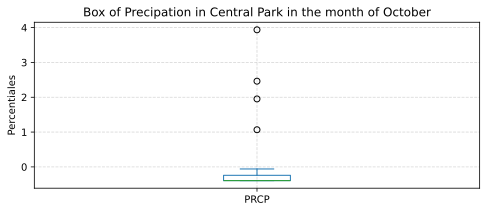

In [ ]:
oct_weather_z_scores.PRCP.plot(kind='box',figsize=(8,3),
                               ylabel="Percentiales",
                               title="Box of Precipation in Central Park in the month of October",)
plt.grid(alpha=0.5, linestyle='--')


In [ ]:
oct_weather_z_scores.query('PRCP > 3')

datatype,TMIN,TMAX,PRCP
date,,,
2018-10-27,-0.751019,-1.201045,3.936167


In [ ]:
central_park_weather.loc["2018-10", 'PRCP'].describe()

,PRCP
count,31.000000
mean,2.941935
std,7.458542
min,0.000000
25%,0.000000
50%,0.000000
75%,1.150000
max,32.300000


In [ ]:
# pd.DataFrame.map
# np.vectorize

###### Applying methods on windows of values

`.rolling()` method allows to apply a function on the values of a window, at a time. There are few considerations which are needed to known before applying it, which being:

1. by default, `.rolling()` methods includes the value of the row (of the specific column on which it is being applied) while applying the function and is only modified by using the `closed` parameter. For instance in the output below it can be oberserved in the third cell in the *rolling_PRCP* column that the it contains the sum of last two values along with it i.e., 0.0 + 17.5 + 0.0 = 17.5. Also,
2. by default, the window is not centered around the current observation.

Further observations can be made through this example:
```python
# Re-import necessary libraries after execution state reset
import pandas as pd
import numpy as np

# Create a sample time series DataFrame
data = {'Date': pd.date_range(start='2023-01-01', periods=10, freq='D'),
        'Value': [10, 15, 18, 20, 30, 25, 27, 35, 40, 50]}

df = pd.DataFrame(data)
df.set_index("Date", inplace=True)

# Apply rolling mean with a window of 3
df['Rolling_Mean'] = df['Value'].rolling(window=3).mean()

# Apply rolling sum with min_periods=1
df['Rolling_Sum'] = df['Value'].rolling(window=3, min_periods=1).sum()

# Apply weighted rolling mean with a Gaussian window
df['Weighted_Mean'] = df['Value'].rolling(window=3, win_type='gaussian').mean(std=1)

# Apply centered rolling mean
df['Rolling_Centered'] = df['Value'].rolling(window=3, center=True).mean()

# Display the DataFrame with results
df
```
```
Result
            Value  Rolling_Mean  Rolling_Sum  Weighted_Mean  Rolling_Centered
Date                                                                         
2023-01-01     10           NaN         10.0            NaN               NaN
2023-01-02     15           NaN         25.0            NaN         14.333333
2023-01-03     18     14.333333         43.0      14.451863         17.666667
2023-01-04     20     17.666667         53.0      17.725931         22.666667
2023-01-05     30     22.666667         68.0      22.192549         25.000000
2023-01-06     25     25.000000         75.0      25.888971         27.333333
2023-01-07     27     27.333333         82.0      26.918480         29.000000
2023-01-08     35     29.000000         87.0      28.644412         34.000000
2023-01-09     40     34.000000        102.0      34.177794         41.666667
2023-01-10     50     41.666667        125.0      41.370343     
```

In [ ]:
central_park_weather.loc['2018-10'].assign(
    rolling_PRCP = lambda x: x.PRCP.rolling('3D').sum()
)[['PRCP', 'rolling_PRCP']].head(7).T

date,2018-10-01,2018-10-02,2018-10-03,2018-10-04,2018-10-05,2018-10-06,2018-10-07
datatype,,,,,,,
PRCP,0.0,17.5,0.0,1.0,0.0,0.0,0.0
rolling_PRCP,0.0,17.5,17.5,18.5,1.0,1.0,0.0


In [ ]:
# pd.Series.rolling

In [ ]:
central_park_weather.loc["2018-10"].rolling('3D')\
.mean().head().iloc[:,:6]

datatype,AWND,PRCP,SNOW,SNWD,TMAX,TMIN
date,,,,,,
2018-10-01,0.900000,0.000000,0.0,0.0,24.400000,17.200000
2018-10-02,0.900000,8.750000,0.0,0.0,24.700000,17.750000
2018-10-03,0.966667,5.833333,0.0,0.0,24.233333,17.566667
2018-10-04,0.800000,6.166667,0.0,0.0,24.233333,17.200000
2018-10-05,1.033333,0.333333,0.0,0.0,23.133333,16.300000


In [ ]:
central_park_weather["2018-10-01":"2018-10-07"].rolling('3D').agg(
    {'TMAX':'max', 'TMIN':'min', 'AWND':'mean', 'PRCP':'sum'}
).join(central_park_weather[['TMAX', 'TMIN', 'AWND', 'PRCP']],
       lsuffix='_rolling_3D'
).sort_index(axis=1)

datatype,AWND,AWND_rolling_3D,PRCP,PRCP_rolling_3D,TMAX,TMAX_rolling_3D,TMIN,TMIN_rolling_3D
date,,,,,,,,
2018-10-01,0.9,0.900000,0.0,0.0,24.4,24.4,17.2,17.2
2018-10-02,0.9,0.900000,17.5,17.5,25.0,25.0,18.3,17.2
2018-10-03,1.1,0.966667,0.0,17.5,23.3,25.0,17.2,17.2
2018-10-04,0.4,0.800000,1.0,18.5,24.4,25.0,16.1,16.1
2018-10-05,1.6,1.033333,0.0,1.0,21.7,24.4,15.6,15.6
2018-10-06,0.5,0.833333,0.0,1.0,20.0,24.4,17.2,15.6
2018-10-07,1.1,1.066667,0.0,0.0,26.1,26.1,19.4,15.6


###### Expanding

Expanding is done to get the cummulative result of a function up to the current value. In difference to rolling which gives us the result of a window of values which continues to shift by one value, `.expanding()` method allows us to get the output of the function till the current cell. The `.agg()` method which was used above to specify the function to be applied, through rolling, to each column, can be used with `.expanding()` method also.

***Note:*** `.agg()` method can also accept numpy functions and list of functions to be applied on a single, in such case each function will give a new column for that.

In [ ]:
central_park_weather['2018-10-01':'2018-10-07'].expanding().agg(
    {
        'TMAX': np.min,
        'TMIN': np.max,
        'AWND': np.mean,
        'PRCP': np.sum
    }
).join(
    central_park_weather[['TMAX', 'TMIN', 'AWND', 'PRCP']],
    lsuffix='_expanding'
).sort_index(axis=1)

<ipython-input-41-814ab61465ed>:1: FutureWarning: The provided callable <function min at 0x7a0db6fa8ae0> is currently using Expanding.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  central_park_weather['2018-10-01':'2018-10-07'].expanding().agg(
<ipython-input-41-814ab61465ed>:1: FutureWarning: The provided callable <function max at 0x7a0db6fa89a0> is currently using Expanding.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  central_park_weather['2018-10-01':'2018-10-07'].expanding().agg(
<ipython-input-41-814ab61465ed>:1: FutureWarning: The provided callable <function mean at 0x7a0db6fa93a0> is currently using Expanding.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  central_park_weather['2018-10-01':'2018-10-07'].

datatype,AWND,AWND_expanding,PRCP,PRCP_expanding,TMAX,TMAX_expanding,TMIN,TMIN_expanding
date,,,,,,,,
2018-10-01,0.9,0.900000,0.0,0.0,24.4,24.4,17.2,17.2
2018-10-02,0.9,0.900000,17.5,17.5,25.0,24.4,18.3,18.3
2018-10-03,1.1,0.966667,0.0,17.5,23.3,23.3,17.2,18.3
2018-10-04,0.4,0.825000,1.0,18.5,24.4,23.3,16.1,18.3
2018-10-05,1.6,0.980000,0.0,18.5,21.7,21.7,15.6,18.3
2018-10-06,0.5,0.900000,0.0,18.5,20.0,20.0,17.2,18.3
2018-10-07,1.1,0.928571,0.0,18.5,26.1,20.0,19.4,19.4


***Note:*** The warnings above explain that when we pass, `np.min` or any other function as such in the `.agg()` while expanding, Pandas is using internal methods such as, `Expanding.min()` internally but, it will change in future and Pandas will switch to, `np.` functions which can be used through string-names such as, `"min"` so, to safegouard our code we should stick to that, what we will do henceforth.

##### Pipes

`.pipes()` method allows us to execute functions on Pandas data-structures recurrsively while maintaing the readability of the code. It works by passing the result of the previous funcion as the argument to the next function in the chain.

In [ ]:
def get_info(df):
  return '%d rows and %d columns and max closing z-score was %d'\
          % (*df.shape,df.close.max())

In [ ]:
get_info(fb.loc['2018-Q1'].apply(lambda x: (x-x.mean())/x.std()))

'61 rows and 5 columns and max closing z-score was 1'

In [ ]:
fb.loc["2018-Q1"].apply(lambda x: (x-x.mean())/x.std())\
  .pipe(get_info)

'61 rows and 5 columns and max closing z-score was 1'

***Note:*** We can also pass on Pandas methods as arguments to `.pipes()` method as, demonstrated below.

In [ ]:
fb.pipe(pd.DataFrame.rolling, '20D').mean().equals(
    fb.rolling('20D').mean() # it checks whether the result gotten from the use of pipe
                             # method equals to it's substitue
)

True

In [ ]:
## This function in the book has been imported, but, for simplifying the task
## I have copied it here.

def window_calc(df, func, agg_dict, *args, **kwargs):
    """
    Run a window calculation of your choice on a `DataFrame` object.

    Parameters:
        - df: The `DataFrame` object to run the calculation on.
        - func: The window calculation method that takes `df`
          as the first argument.
        - agg_dict: Information to pass to `agg()`, could be a
          dictionary mapping the columns to the aggregation
          function to use, a string name for the function,
          or the function itself.
        - args: Positional arguments to pass to `func`.
        - kwargs: Keyword arguments to pass to `func`.

    Returns:
        A new `DataFrame` object.
    """
    return df.pipe(func, *args, **kwargs).agg(agg_dict)

In [ ]:
window_calc??

In [ ]:
# In wake of the above waning regarding epxanding method, I have used, 'median'
# instead np.median

window_calc(fb, pd.DataFrame.expanding, 'median').head()

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.580,177.5500,181.420,18151903.0
2018-01-03,179.78,183.180,179.4400,183.045,17519233.0
2018-01-04,181.88,184.780,181.3300,184.330,16886563.0
2018-01-05,183.39,185.495,182.7148,184.500,15383729.5
2018-01-08,184.90,186.210,184.0996,184.670,16886563.0


In [ ]:
window_calc(fb, pd.DataFrame.ewm, 'mean', span=3).head()

,open,high,low,close,volume
date,,,,,
2018-01-02,177.680000,181.580000,177.550000,181.420000,1.815190e+07
2018-01-03,180.480000,183.713333,180.070000,183.586667,1.730834e+07
2018-01-04,183.005714,185.140000,182.372629,184.011429,1.534980e+07
2018-01-05,184.384000,186.078667,183.736560,185.525333,1.440299e+07
2018-01-08,185.837419,187.534839,185.075110,186.947097,1.625679e+07


In [ ]:
window_calc(central_park_weather.loc["2018-10"],
            pd.DataFrame.rolling,
            {'TMAX': 'max', 'TMIN': 'min', 'AWND':'mean', 'PRCP':'sum'},
            '3D'
            ).head()

datatype,TMAX,TMIN,AWND,PRCP
date,,,,
2018-10-01,24.4,17.2,0.900000,0.0
2018-10-02,25.0,17.2,0.900000,17.5
2018-10-03,25.0,17.2,0.966667,17.5
2018-10-04,25.0,16.1,0.800000,18.5
2018-10-05,24.4,15.6,1.033333,1.0


### Aggregations with Pandas and Numpy

In [ ]:
weather = pd.read_csv(filepath_or_buffer='/content/Data-Analytics-Learning-and-Projects/Chapter-4/Data/weather_by_station.csv',
                      index_col='date',
                      parse_dates=True)
fb = pd.read_csv(filepath_or_buffer='/content/Data-Analytics-Learning-and-Projects/Chapter-4/Data/fb_2018.csv',
                 index_col='date',
                 parse_dates=True).assign(
                     trading_volume=lambda x: pd.cut(
                         x.volume, bins=3, labels=['low', 'med', 'high']
                     )
                 )

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

#### Summarizing DataFrames

***Note:*** When we apply `.agg()` method directly on a dataframe then, we get a series rather than a dataframe, as each column retruns a single value.

In [ ]:
fb.agg({
    'open':'mean', 'high':'max', 'low':'min',
    'close':'mean', 'volume': 'sum'
})

,0
open,171.45
high,218.62
low,123.02
close,171.51
volume,6949682394.00


In [ ]:
fb.agg({
    'open': 'mean', 'high': ['min', 'max'],
    'low': ['min', 'max'], 'close': 'mean'
})

,open,high,low,close
mean,171.45,NaN,NaN,171.51
min,NaN,129.74,123.02,NaN
max,NaN,218.62,214.27,NaN


#### Using groupby

In [ ]:
fb.groupby(
    'trading_volume'
).mean()

<ipython-input-8-29b4421c3e6f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fb.groupby(


,open,high,low,close,volume
trading_volume,,,,,
low,171.36,173.46,169.31,171.43,24547207.71
med,175.82,179.42,172.11,175.14,79072559.12
high,167.73,170.48,161.57,168.16,141924023.33


***Expalanation:*** What the below code is doing is grouping the rows on the basis of their, volume category and taking the *close* column out and calculating the min, max and mean for each of these category over the values of *close* column.

In [ ]:
fb.groupby('trading_volume')['close'].agg(['min','max', 'mean'])

<ipython-input-9-a10086daab09>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fb.groupby('trading_volume')['close'].agg(['min','max', 'mean'])


,min,max,mean
trading_volume,,,
low,124.06,214.67,171.43
med,152.22,217.50,175.14
high,160.06,176.26,168.16


The warning that has been encountered above:

```
<ipython-input-69-a10086daab09>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fb.groupby('trading_volume')['close'].agg(['min','max', 'mean'])
```
indicates that in future versions of pandas, the default behavior of the `groupby()` method's observed parameter will change. Currently, observed=False by default, meaning that when you group by a categorical variable, all categories (both observed and unobserved) are included in the groupby operation. In upcoming versions, the default will switch to `observed=True`, which will include only the observed categories in the result.

Implications:

If you're grouping by a categorical column and want to ensure that all categories are considered (including those not present in the data), you should explicitly set observed=False.

Conversely, if you only want to include categories that are present in the data, you can set `observed=True`.

In [ ]:
fb_agg = fb.groupby('trading_volume').agg({
    'open':'mean',
    'high': ['min', 'max'],
    'low': ['min', 'max'],
    'close': 'mean'
})
fb_agg

<ipython-input-10-f00481f439e4>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fb_agg = fb.groupby('trading_volume').agg({


open   high           low         close
                 mean    min    max    min    max   mean
trading_volume                                          
low            171.36 129.74 216.20 123.02 212.60 171.43
med            175.82 162.85 218.62 150.75 214.27 175.14
high           167.73 161.10 180.13 149.02 173.75 168.16

In [ ]:
# The result of grouping and and aggregation the columns are stored as MultiIndex object

fb_agg.columns

MultiIndex([( 'open', 'mean'),
            ( 'high',  'min'),
            ( 'high',  'max'),
            (  'low',  'min'),
            (  'low',  'max'),
            ('close', 'mean')],
           )

In [ ]:
fb_agg.columns = ['_'.join(col_agg) for col_agg in fb_agg.columns]
fb_agg.head()

,open_mean,high_min,high_max,low_min,low_max,close_mean
trading_volume,,,,,,
low,171.36,129.74,216.20,123.02,212.60,171.43
med,175.82,162.85,218.62,150.75,214.27,175.14
high,167.73,161.10,180.13,149.02,173.75,168.16


In [ ]:
weather.head()

,datatype,station,value,station_name
date,,,,
2018-01-01,PRCP,GHCND:US1CTFR0039,0.00,"STAMFORD 4.2 S, CT US"
2018-01-01,PRCP,GHCND:US1NJBG0015,0.00,"NORTH ARLINGTON 0.7 WNW, NJ US"
2018-01-01,SNOW,GHCND:US1NJBG0015,0.00,"NORTH ARLINGTON 0.7 WNW, NJ US"
2018-01-01,PRCP,GHCND:US1NJBG0017,0.00,"GLEN ROCK 0.7 SSE, NJ US"
2018-01-01,SNOW,GHCND:US1NJBG0017,0.00,"GLEN ROCK 0.7 SSE, NJ US"


In [ ]:
# There is an error in the code used in the book: it doesn't the mean() function just
# to the columns which are numeric type.

weather.loc["2018-10"].query('datatype == "PRCP"')['value'].groupby(
    pd.Grouper(freq='D')
).mean().head()

,value
date,
2018-10-01,0.01
2018-10-02,2.23
2018-10-03,19.69
2018-10-04,0.32
2018-10-05,0.97


In [ ]:
# pd.Grouper

In [ ]:
# The result might differ from what's given in the book as, sort=False is used by us
# rather than the defualt, sort=False, and we have used the head() method rather than
# smaple() method.

weather.query('datatype=="PRCP"').groupby(
    ['station_name', pd.Grouper(freq='Q')], sort=False
)['value'].sum().unstack().head()

<ipython-input-16-353c9449f9bb>:6: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  ['station_name', pd.Grouper(freq='Q')], sort=False


date,2018-03-31,2018-06-30,2018-09-30,2018-12-31
station_name,,,,
"STAMFORD 4.2 S, CT US",338.00,272.10,424.70,390.00
"NORTH ARLINGTON 0.7 WNW, NJ US",327.70,321.90,496.10,393.30
"GLEN ROCK 0.7 SSE, NJ US",289.80,321.90,432.10,404.00
"PALISADES PARK 0.2 WNW, NJ US",325.20,341.70,624.10,309.60
"OAKLAND 0.9 SSE, NJ US",379.90,354.30,514.10,477.30


***Explanation:*** In the code below we are trying to know which moths have the highest precipation in a year. The results we achieved are surprising as per the book so, we will look into the matter further.

In [ ]:
# Optimizing over the code in the book, which is mentioned below

# weather.query('datatype == "PRCP"').value\
#        .groupby(pd.Grouper(freq='D')).mean()\
#        .groupby(pd.Grouper(freq='M')).sum().nlargest()

# There are few considerations, to use the method set_index() we need to convert
# a Series object in a DataFrame object and set_index() method doesn't take a
# function as an argument so, we need to use the assign() method first to create
# the required column. Also, numeric value of months/ days can be achieved through
# the attribute but, their names are available through the use of month_name()/ day_name()
# method.

weather.query('datatype == "PRCP"').value\
       .groupby(pd.Grouper(freq='D')).mean()\
       .groupby(pd.Grouper(freq='M')).sum()\
       .to_frame()\
       .assign(Month = lambda x: x.index.month_name())\
       .set_index('Month')\
       .nlargest(5, 'value')

<ipython-input-17-91c52ddce0e4>:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby(pd.Grouper(freq='M')).sum()\


,value
Month,
November,210.59
September,193.09
August,192.45
July,160.98
February,158.11


###### Use of `.transform()` method

`pd.DataFrame.transform()` method allows to apply a function to a dataframe, whether to apply is on colunns or rows is decided by the `axis` param, with an exception that it maintains the shape of the `self`, in this case the dataframe it is being applied on. So, when `.transform()` method is applied on a grouped dataframe, it repeat the values of the aggregation to ech row, as can be seen from the result in the following code block. Although, the use of `.transform()` method may seem futile it's important in some sceonarios such as when we want require the count of rows in each group along with the aggregated value for that group.

In [ ]:
weather.query('datatype == "PRCP"')\
  .rename(
    dict(value='prcp'), axis=1
  ).prcp\
   .groupby(pd.Grouper(freq='D')).mean()\
   .groupby(pd.Grouper(freq='M')).transform(np.sum)["2018-01-28":"2018-02-03"]

<ipython-input-18-e7e5fffda295>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby(pd.Grouper(freq='M')).transform(np.sum)["2018-01-28":"2018-02-03"]
<ipython-input-18-e7e5fffda295>:6: FutureWarning: The provided callable <function sum at 0x7e1d847e02c0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  .groupby(pd.Grouper(freq='M')).transform(np.sum)["2018-01-28":"2018-02-03"]


,prcp
date,
2018-01-28,69.31
2018-01-29,69.31
2018-01-30,69.31
2018-01-31,69.31
2018-02-01,158.11
2018-02-02,158.11
2018-02-03,158.11


In [ ]:
weather\
  .query('datatype=="PRCP"')\
  .rename(dict(value='prcp'), axis=1).prcp\
  .groupby(pd.Grouper(freq='D')).mean()\
  .to_frame()\
  .assign(
      total_prcp_in_month=lambda x: x.groupby(
          pd.Grouper(freq='M')
      ).transform(np.sum),
      pct_monthly_prcp=lambda x: x.prcp.div(
          x.total_prcp_in_month
      )
  ).nlargest(5, 'pct_monthly_prcp')

<ipython-input-19-7104f76749db>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.Grouper(freq='M')
<ipython-input-19-7104f76749db>:9: FutureWarning: The provided callable <function sum at 0x7e1d847e02c0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ).transform(np.sum),


,prcp,total_prcp_in_month,pct_monthly_prcp
date,,,
2018-10-12,34.77,105.63,0.33
2018-01-13,21.66,69.31,0.31
2018-03-02,38.77,137.46,0.28
2018-04-16,39.34,140.57,0.28
2018-04-17,37.30,140.57,0.27


***Explanation:*** The 4<sup>th</sup> and 5<sup>th</sup> place days in terms of the amount of monthly precipitation they accounted for make up more than 50% of the rain in April. They were also consecutive days.

#### Pivot Tables and corsstables

Pandas provide several methods for aggregating data and these methods often have the ability to produce the same or similar results with the exception in either prodcuing the output format or the default values they assume for certain parameters. `pivot_table()`, `groupby()` and `crosstab()`, all can be used, as can be observed in the following code-blocks, to produce essentially the same result, with some tweaks in the code but, the simplicity of getting a certain result is facilitate the use of them all.

###### 1. `pivot_table` vs. `crosstab`

Both `pivot_table` and `crosstab` can produce similar tabular summaries, but they have distinct differences:

- **Input Data:**
  - **`pivot_table`:** Designed to work directly with DataFrames. You specify column names for the `index`, `columns`, and `values` parameters.
  - **`crosstab`:** More flexible with input types; accepts array-like objects (e.g., lists, Series) for the `index` and `columns` parameters, not necessarily requiring a DataFrame. citeturn0search0

- **Aggregation Function:**
  - **`pivot_table`:** Allows specification of various aggregation functions via the `aggfunc` parameter (e.g., `mean`, `sum`, `count`). If not specified, it defaults to computing the mean.
  - **`crosstab`:** Primarily used for computing frequency tables (i.e., counts). While it can perform other aggregations using the `aggfunc` parameter, its default behavior is to compute the count of occurrences.

- **Use Cases:**
  - **`pivot_table`:** Ideal for summarizing data with multiple aggregation functions and handling numeric data aggregations.
  - **`crosstab`:** Best suited for creating frequency tables to examine relationships between categorical variables. citeturn0search15

**Example:**

Given a DataFrame `df` with columns `'A'`, `'B'`, and `'C'`:

```python
import pandas as pd

# Sample DataFrame
df = pd.DataFrame({
    'A': ['foo', 'foo', 'bar', 'bar'],
    'B': ['one', 'two', 'one', 'two'],
    'C': [1, 2, 3, 4]
})

# Using pivot_table
pivot = pd.pivot_table(df, index='A', columns='B', values='C', aggfunc='sum')

# Using crosstab
crosstab = pd.crosstab(index=df['A'], columns=df['B'], values=df['C'], aggfunc='sum')
```


Both will produce a similar table, but `pivot_table` is generally more versatile for complex aggregations.

### 2. `groupby` vs. `pivot_table`

While both `groupby` and `pivot_table` can be used for data aggregation, they differ in output structure and use cases:

- **`groupby`:**
  - **Output Structure:** Produces a Series or DataFrame with hierarchical indices, which may require additional steps (e.g., `unstack()`) to reshape for analysis or presentation.
  - **Use Cases:** Suitable for detailed, multi-dimensional analyses where hierarchical indexing is appropriate.

- **`pivot_table`:**
  - **Output Structure:** Returns a DataFrame with a more straightforward, spreadsheet-like tabular format, making it more intuitive for data visualization and reporting.
  - **Use Cases:** Preferred for creating summary tables where data needs to be presented in a clear, organized manner. citeturn0search1

**Example:**

Using the same DataFrame `df`:

```python
import numpy as np

# Using groupby
grouped = df.groupby(['A', 'B'])['C'].sum().unstack()

# Using pivot_table
pivot = df.pivot_table(index='A', columns='B', values='C', aggfunc=np.sum)
```


Both approaches yield similar results, but `pivot_table` provides a more accessible format for many users.

**Conclusion:**

- Use `pivot_table` when working with DataFrames to create summarized views with various aggregation functions.
- Opt for `crosstab` when analyzing relationships between categorical variables, especially for frequency counts.
- Employ `groupby` for detailed, multi-dimensional analyses where hierarchical indexing is beneficial.

Understanding these distinctions will help you choose the most appropriate method for your data analysis tasks.

In [ ]:
# fb.head()

In [ ]:
# pd.DataFrame.pivot_table

In [ ]:
fb.pivot_table(columns='trading_volume')

<ipython-input-21-1f22192fcd22>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  fb.pivot_table(columns='trading_volume')


trading_volume,low,med,high
close,171.43,175.14,168.16
high,173.46,179.42,170.48
low,169.31,172.11,161.57
open,171.36,175.82,167.73
volume,24547207.71,79072559.12,141924023.33


In [ ]:
fb.pivot_table(index='trading_volume')

<ipython-input-23-1d5c7c43de82>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  fb.pivot_table(index='trading_volume')


,close,high,low,open,volume
trading_volume,,,,,
low,171.43,173.46,169.31,171.36,24547207.71
med,175.14,179.42,172.11,175.82,79072559.12
high,168.16,170.48,161.57,167.73,141924023.33


In [ ]:
# To understand the functioniong of pivot_table() method, we didnot use reset_index()
# and tail() method here. In the next code block, the code provided in the book is
# replicated as it is.

weather.reset_index().pivot_table(
    index=['date', 'station', 'station_name'],
    columns = 'datatype',
    values='value',
    aggfunc='median'
)

datatype                                                          AWND  DAPR  \
date       station           station_name                                      
2018-01-01 GHCND:US1CTFR0039 STAMFORD 4.2 S, CT US                 NaN   NaN   
           GHCND:US1NJBG0015 NORTH ARLINGTON 0.7 WNW, NJ US        NaN   NaN   
           GHCND:US1NJBG0017 GLEN ROCK 0.7 SSE, NJ US              NaN   NaN   
           GHCND:US1NJBG0018 PALISADES PARK 0.2 WNW, NJ US         NaN   NaN   
           GHCND:US1NJBG0023 OAKLAND 0.9 SSE, NJ US                NaN   NaN   
...                                                                ...   ...   
2018-12-31 GHCND:USW00054787 FARMINGDALE REPUBLIC AIRPORT, NY US  5.00   NaN   
           GHCND:USW00094728 NY CITY CENTRAL PARK, NY US           NaN   NaN   
           GHCND:USW00094741 TETERBORO AIRPORT, NJ US             1.70   NaN   
           GHCND:USW00094745 WESTCHESTER CO AIRPORT, NY US        2.70   NaN   
           GHCND:USW00094789 JFK INTERNATIONAL AIRPORT, NY US     4.10   NaN   

datatype                                                          MDPR  \
date       station           station_name                                
2018-01-01 GHCND:US1CTFR0039 STAMFORD 4.2 S, CT US                 NaN   
           GHCND:US1NJBG0015 NORTH ARLINGTON 0.7 WNW, NJ US        NaN   
           GHCND:US1NJBG0017 GLEN ROCK 0.7 SSE, NJ US              NaN   
           GHCND:US1NJBG0018 PALISADES PARK 0.2 WNW, NJ US         NaN   
           GHCND:US1NJBG0023 OAKLAND 0.9 SSE, NJ US                NaN   
...                                                                ...   
2018-12-31 GHCND:USW00054787 FARMINGDALE REPUBLIC AIRPORT, NY US   NaN   
           GHCND:USW00094728 NY CITY CENTRAL PARK, NY US           NaN   
           GHCND:USW00094741 TETERBORO AIRPORT, NJ US              NaN   
           GHCND:USW00094745 WESTCHESTER CO AIRPORT, NY US         NaN   
           GHCND:USW00094789 JFK INTERNATIONAL AIRPORT, NY US      NaN   

datatype                                                            PGTM  \
date       station           station_name                                  
2018-01-01 GHCND:US1CTFR0039 STAMFORD 4.2 S, CT US                   NaN   
           GHCND:US1NJBG0015 NORTH ARLINGTON 0.7 WNW, NJ US          NaN   
           GHCND:US1NJBG0017 GLEN ROCK 0.7 SSE, NJ US                NaN   
           GHCND:US1NJBG0018 PALISADES PARK 0.2 WNW, NJ US           NaN   
           GHCND:US1NJBG0023 OAKLAND 0.9 SSE, NJ US                  NaN   
...                                                                  ...   
2018-12-31 GHCND:USW00054787 FARMINGDALE REPUBLIC AIRPORT, NY US 2052.00   
           GHCND:USW00094728 NY CITY CENTRAL PARK, NY US             NaN   
           GHCND:USW00094741 TETERBORO AIRPORT, NJ US            1954.00   
           GHCND:USW00094745 WESTCHESTER CO AIRPORT, NY US       2212.00   
           GHCND:USW00094789 JFK INTERNATIONAL AIRPORT, NY US        NaN   

datatype                                                          PRCP  SNOW  \
date       station           station_name                                      
2018-01-01 GHCND:US1CTFR0039 STAMFORD 4.2 S, CT US                0.00   NaN   
           GHCND:US1NJBG0015 NORTH ARLINGTON 0.7 WNW, NJ US       0.00  0.00   
           GHCND:US1NJBG0017 GLEN ROCK 0.7 SSE, NJ US             0.00  0.00   
           GHCND:US1NJBG0018 PALISADES PARK 0.2 WNW, NJ US        0.00  0.00   
           GHCND:US1NJBG0023 OAKLAND 0.9 SSE, NJ US               0.00  0.00   
...                                                                ...   ...   
2018-12-31 GHCND:USW00054787 FARMINGDALE REPUBLIC AIRPORT, NY US 28.70   NaN   
           GHCND:USW00094728 NY CITY CENTRAL PARK, NY US         25.90  0.00   
           GHCND:USW00094741 TETERBORO AIRPORT, NJ US            29.20   NaN   
           GHCND:USW00094745 WESTCHESTER CO AIRPORT, NY US       24.40   NaN   
           GHCND:USW00094789 JFK INTERNATIONAL 

In [ ]:
weather.reset_index().pivot_table(
    index=['date', 'station', 'station_name'],
    columns = 'datatype',
    values='value',
    aggfunc='median'
).reset_index().tail()

datatype,date,station,station_name,AWND,DAPR,MDPR,PGTM,PRCP,SNOW,SNWD,...,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09,WT11
28740,2018-12-31,GHCND:USW00054787,"FARMINGDALE REPUBLIC AIRPORT, NY US",5.00,NaN,NaN,2052.00,28.70,NaN,NaN,...,15.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28741,2018-12-31,GHCND:USW00094728,"NY CITY CENTRAL PARK, NY US",NaN,NaN,NaN,NaN,25.90,0.00,0.00,...,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28742,2018-12-31,GHCND:USW00094741,"TETERBORO AIRPORT, NJ US",1.70,NaN,NaN,1954.00,29.20,NaN,NaN,...,8.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28743,2018-12-31,GHCND:USW00094745,"WESTCHESTER CO AIRPORT, NY US",2.70,NaN,NaN,2212.00,24.40,NaN,NaN,...,11.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28744,2018-12-31,GHCND:USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",4.10,NaN,NaN,NaN,31.20,0.00,0.00,...,12.50,1.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# pd.DataFrame.groupby

***Useful:*** In the code below, when we are passing, `fb.index.month` or `fb.trading_volume` as the values of `index`, `columns` or `by` attribute of the methods used below, we leveraging the ability of Pandas aggregation methods to accept, `Series` or `Array` objects, <mark>of the same lenght as the dataframe</mark>, to identify each row for it to be categorized. The length of these arrays can be observed to same as of the dataframe `fb`.

```python
fb.index.month.shape[0], fb.trading_volume.shape[0]
```
```
(251,251)
```

In [ ]:
pd.pivot_table(
    data=fb,
    index=fb.trading_volume,
    columns=fb.index.month,
    aggfunc='count'
)['close']

<ipython-input-33-168ad23ea46e>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(


date,1,2,3,4,5,6,7,8,9,10,11,12
trading_volume,,,,,,,,,,,,
low,20,19,15,20,22,21,18,23,19,23,21,19
med,1,0,4,1,0,0,2,0,0,0,0,0
high,0,0,2,0,0,0,1,0,0,0,0,0


In [ ]:
pd.crosstab(
    index=fb.trading_volume,
    columns=fb.index.month,
    colnames=['month']
)

month,1,2,3,4,5,6,7,8,9,10,11,12
trading_volume,,,,,,,,,,,,
low,20,19,15,20,22,21,18,23,19,23,21,19
med,1,0,4,1,0,0,2,0,0,0,0,0
high,0,0,2,0,0,0,1,0,0,0,0,0


In [ ]:
fb.groupby(
    by=['trading_volume',fb.index.month]
).count().unstack()['close'].rename_axis(columns='month')

<ipython-input-46-b3b1ef1271c2>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fb.groupby(


month,1,2,3,4,5,6,7,8,9,10,11,12
trading_volume,,,,,,,,,,,,
low,20,19,15,20,22,21,18,23,19,23,21,19
med,1,0,4,1,0,0,2,0,0,0,0,0
high,0,0,2,0,0,0,1,0,0,0,0,0


In [ ]:
test_fb = fb.groupby(by=['trading_volume',pd.Grouper(freq='ME', label='right')])\
  .count()\
  .unstack()['close']\
  .rename_axis(columns='month')
test_fb.columns = np.arange(1,13)
test_fb

<ipython-input-74-0277d1eb9d10>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  test_fb = fb.groupby(by=['trading_volume',pd.Grouper(freq='ME', label='right')])\


,1,2,3,4,5,6,7,8,9,10,11,12
trading_volume,,,,,,,,,,,,
low,20,19,15,20,22,21,18,23,19,23,21,19
med,1,0,4,1,0,0,2,0,0,0,0,0
high,0,0,2,0,0,0,1,0,0,0,0,0


In [ ]:
# Just to check the values of the index.month attribute
fb.index.month[0:30]

Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2],
      dtype='int32', name='date')

In [ ]:
snow_data = weather.query('datatype == "SNOW"')
pd.crosstab(
    index=snow_data.station_name,
    columns=snow_data.index.month,
    colnames=['month'],
    values=snow_data.value,
    aggfunc=lambda x: (x > 0).sum(), # It is be noted again that the function passed is used
    margins=True,                   # on an Array so, x here is an array and (x > 0) produces a mask.
    margins_name='total observations of snow'
)

month,1,2,3,4,5,6,7,8,9,10,11,12,total observations of snow
station_name,,,,,,,,,,,,,
"ALBERTSON 0.2 SSE, NY US",3.00,1.00,3.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,9
"AMITYVILLE 0.1 WSW, NY US",1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3
"AMITYVILLE 0.6 NNE, NY US",3.00,1.00,3.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8
"ARMONK 0.3 SE, NY US",6.00,4.00,6.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,3.00,23
"BLOOMINGDALE 0.7 SSE, NJ US",2.00,1.00,3.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"WESTFIELD 0.6 NE, NJ US",3.00,0.00,4.00,1.00,0.00,NaN,0.00,0.00,0.00,NaN,1.00,NaN,9
"WOODBRIDGE TWP 1.1 ESE, NJ US",4.00,1.00,3.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,11
"WOODBRIDGE TWP 1.1 NNE, NJ US",2.00,1.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,7


### Time Series

In [ ]:
fb = pd.read_csv(
    filepath_or_buffer = "/content/Data-Analytics-Learning-and-Projects/Chapter-4/Data/fb_2018.csv",
    index_col = 'date',
    parse_dates = True
).assign(
    trading_volume = lambda x: pd.cut(
        x.volume, bins=3, labels=['low', 'med', 'high']
    )
)

#### Time-based selection and filtering

In [ ]:
import datetime as dt

In [ ]:
(fb.index[0]+ dt.timedelta(days=4)).strftime('%Y-%m-%d')

'2018-01-06'

In [ ]:
# Book code: fb['2018-q1].equals(fb["2018-01":"2018-03"]) ## .loc[] includes the last index value of the range too.

fb.loc['2018-q1'].equals(fb.loc['2018-01':'2018-03'])

True

In [ ]:
fb.index[0].strftime('%Y-%m-%d')

'2018-01-02'

***Explanation:***

In [ ]:
# Book code: fb.first('W') ## To select the first week of stock prices in 2018.
# first() method has been deprecated
# !The code below is not some general to dataframes

fb.loc[fb.index[0].strftime('%Y-%m-%d'):(fb.index[0]+ dt.timedelta(4)).strftime('%Y-%m-%d')]

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903,low
2018-01-03,181.88,184.78,181.3300,184.67,16886563,low
2018-01-04,184.90,186.21,184.0996,184.33,13880896,low
2018-01-05,185.59,186.90,184.9300,186.85,13574535,low


***!Important:*** As per the warning the `date_parser` attribute has been deprecated and we should use, `date_format` attribute instead. Also, the default format includes time along with date so, basically we don't even need to do this for this dataframe.

In [ ]:
stock_data_per_minute = pd.read_csv(
    "/content/Data-Analytics-Learning-and-Projects/Chapter-4/Data/fb_week_of_may_20_per_minute.csv",
    index_col='date',
    parse_dates=True,
    date_parser = lambda x: pd.to_datetime(x, format="%Y-%m-%d %H-%M")
)

<ipython-input-10-f08ac438007d>:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  stock_data_per_minute = pd.read_csv(


In [ ]:
stock_data_per_minute.head()

,open,high,low,close,volume
date,,,,,
2019-05-20 09:30:00,181.6200,181.6200,181.6200,181.6200,159049.0
2019-05-20 09:31:00,182.6100,182.6100,182.6100,182.6100,468017.0
2019-05-20 09:32:00,182.7458,182.7458,182.7458,182.7458,97258.0
2019-05-20 09:33:00,182.9500,182.9500,182.9500,182.9500,43961.0
2019-05-20 09:34:00,183.0600,183.0600,183.0600,183.0600,79562.0


In [ ]:
stock_data_per_minute.groupby(pd.Grouper(freq='1D')).agg({
'open': 'first', 'high': 'max', 'low': 'min',
'close': 'last', 'volume': 'sum'
})

,open,high,low,close,volume
date,,,,,
2019-05-20,181.62,184.1800,181.6200,182.72,10044838.0
2019-05-21,184.53,185.5800,183.9700,184.82,7198405.0
2019-05-22,184.81,186.5603,184.0120,185.32,8412433.0
2019-05-23,182.50,183.7300,179.7559,180.87,12479171.0
2019-05-24,182.33,183.5227,181.0400,181.06,7686030.0


In [ ]:
stock_data_per_minute.at_time('9:30')

,open,high,low,close,volume
date,,,,,
2019-05-20 09:30:00,181.62,181.62,181.62,181.62,159049.0
2019-05-21 09:30:00,184.53,184.53,184.53,184.53,58171.0
2019-05-22 09:30:00,184.81,184.81,184.81,184.81,41585.0
2019-05-23 09:30:00,182.50,182.50,182.50,182.50,121930.0
2019-05-24 09:30:00,182.33,182.33,182.33,182.33,52681.0


***Explanation:*** The code in the book depicts the use of `.between_time()` method to select indices lying between the specific time values with the default value of the attribute `inclusive="both"`. The observation in result is made that the trading volume is higher at `16:00` than `15:00` each day with the possible hypothesis that people rush to trade at the closing time. To make the difference in trading-volume each day we, have added an extra column which shows the percentage change of the traded-volume from `15:59` to `16:00`. To achieve simplicity we have removed the rows at time, `15:59`.

In [ ]:
# The code in the book:
# stock_data_per_minute.between_time("15:59", "16:00")

stock_data_per_minute.between_time("15:59","16:00").assign(
    pct_volume_diff_day = lambda x: x.volume.pct_change()
).at_time("16:00")

,open,high,low,close,volume,pct_volume_diff_day
date,,,,,,
2019-05-20 16:00:00,182.72,182.72,182.72,182.72,1113672.0,7.275844
2019-05-21 16:00:00,184.82,184.82,184.82,184.82,801080.0,12.003279
2019-05-22 16:00:00,185.32,185.32,185.32,185.32,1220993.0,11.705574
2019-05-23 16:00:00,180.87,180.87,180.87,180.87,1329217.0,11.122583
2019-05-24 16:00:00,181.06,181.06,181.06,181.06,764906.0,13.433823


##### **Understanding `.filter()` in `groupby` Context**

###### 1. Function Parameter:
- The `.filter()` method in a `groupby` context accepts a **function** (`func`) that is applied to each group (i.e., each subset of the DataFrame created by the `groupby` operation).
- This function should return a **boolean value**:
  - **`True`**: The group satisfies the condition and is **retained** in the result.
  - **`False`**: The group does **not** satisfy the condition and is **excluded** from the result.

###### 2. Application to Groups:
- When you perform a `groupby` operation, pandas organizes the DataFrame into groups based on the specified criteria (e.g., a column value or a time frequency).
- The `.filter()` method then evaluates the provided function on **each group as a whole**, not on individual rows or columns.

###### 3. Behavior with `.all()`:
- Example usage:
  ```python
  .filter(lambda x: (x.volume > 0).all())
  ```
  - For each group `x` (representing data for a specific day):
    - `x.volume > 0` creates a boolean Series indicating whether each row's `volume` is greater than 0.
    - `.all()` checks if **all** values in this boolean Series are `True`.
    - If all are `True`, the lambda function returns `True`, and the group is retained. Otherwise, it's excluded.


###### **Documentation Clarity:**
- The pandas documentation specifies that `.filter()` accepts a function that determines whether each group should be included based on a boolean criterion.
- While the documentation may not explicitly detail every possible use case (such as using `.all()` within the function), the method is designed to handle scenarios where the function returns a boolean value for each group.
  - **Reference:** [Pandas `.filter()` Documentation](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.filter.html)

###### **Axis and Function Application:**
- The function provided to `.filter()` is applied to **each group** resulting from the `groupby` operation.
- Within this function, you can perform operations that consider the group's structure (rows and columns). The key is that the function should return a single boolean value for the entire group, determining whether that group is included in the final result.

###### **Result of `.filter()` with `.all()`:**
- When using `.all()` within the filter function, it evaluates a condition across all rows of a specific column (or Series) within each group.
- The function returns `True` if the condition holds for all rows in that group, leading to the group's inclusion in the final DataFrame.

###### **Summary**
- The `.filter()` method in pandas' `groupby` context allows for the inclusion or exclusion of entire groups based on a function that evaluates each group and returns a boolean value.
- This function can perform various checks, including using methods like `.all()`, to determine if the group's data meets specific criteria.
- The documentation provides the foundational understanding, and practical use cases, such as the one you've encountered, demonstrate the method's flexibility in handling group-wise filtering operations.

**Additional Reference:**
- [Pandas `groupby` Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)



***Note:*** `pd.DataFrame.filter` or `pd.Series.filter` doesn't provide the `func` paramter but, `pandas.core.groupby.DataFrameGroupBy.filter` does, which is being used here. It's suggested that along with the info above, the note mentioned below the code block should too be studied.

In [ ]:
shares_traded_in_first_30_min = stock_data_per_minute\
  .between_time("9:30", "10:00")\
  .groupby(pd.Grouper(freq='1D'))\
  .filter(lambda x: (x.volume > 0).all())\
  .volume.mean()

shares_traded_in_last_30_min = stock_data_per_minute\
  .between_time("15:30", "16:00")\
  .groupby(pd.Grouper(freq='1D'))\
  .filter(lambda x: (x.volume > 0).all())\
  .volume.mean()

shares_traded_in_first_30_min - shares_traded_in_last_30_min

np.float64(18592.967741935485)

##### **Filtering in Grouped DataFrames: Why `.loc` and `.iloc` Don't Work**  

Standard selection methods like `.loc`, `.iloc`, `.at`, and `.iat` do not work directly on a **grouped DataFrame** because `groupby` objects are **collections of DataFrames** (one per group) rather than a single tabular structure.  

- **`.loc` and `.iloc`**: These work on a **single** DataFrame, but a `groupby` object stores **multiple** DataFrames.  
- **`.at` and `.iat`**: These are optimized for fast **single-value lookups** but cannot operate properly when data is split into groups.  

##### **Correct Ways to Filter Grouped Data**  

1. Using `.filter()` (Preferred for Filtering Entire Groups)
Instead of filtering individual rows, `.filter()` **removes entire groups** based on a condition applied to each group.  

*Example: Keep only groups where the mean `value` is greater than 10*  
```python
filtered_df = df.groupby("category").filter(lambda x: x["value"].mean() > 10)
```
  - This **removes** entire groups where the mean of `value` is **≤ 10**.  

2. Using `.apply()` for Custom Filtering
When more complex filtering logic is required, `.apply()` can be used.  

*Example: Keep only rows where `value` is greater than the group's mean*
```python
filtered_df = df.groupby("category").apply(lambda x: x[x["value"] > x["value"].mean()])
```
  - This filters **within each group**, keeping only rows where `value` is above the group’s mean.  

3. Using `.get_group()` to Select a Specific Group
If you need only one specific group, use `.get_group()`.  

*Example: Get all rows for category "A"*  
```python
df.groupby("category").get_group("A")
```
  - This retrieves the subset of data where `category == "A"`.


#### Shifting for lagged data

***Explanation:*** The code below gives us the result of *after-hours* trading on opening price of stocks.

In [ ]:
fb.assign(
    prior_close = lambda x: x.close.shift(),
    after_hours_change_in_price = lambda x: x.open - x.prior_close, # Diff. in previous day's closing price and today's opening price
    abs_change = lambda x: x.after_hours_change_in_price.abs()
).nlargest(5, 'abs_change')

,open,high,low,close,volume,trading_volume,prior_close,after_hours_change_in_price,abs_change
date,,,,,,,,,
2018-07-26,174.89,180.13,173.75,176.26,169803668,high,217.50,-42.61,42.61
2018-04-26,173.22,176.27,170.80,174.16,77556934,med,159.69,13.53,13.53
2018-01-12,178.06,181.48,177.40,179.37,77551299,med,187.77,-9.71,9.71
2018-10-31,155.00,156.40,148.96,151.79,60101251,low,146.22,8.78,8.78
2018-03-19,177.01,177.17,170.06,172.56,88140060,med,185.09,-8.08,8.08


In [ ]:
# fb.loc["2018-09"]
fb.loc["2018-09"].first_valid_index()
# fb.loc["2018-09"].sort_index(ascending=False)
fb.loc["2018-09"].last_valid_index()

Timestamp('2018-09-28 00:00:00')

***Note:*** When we want to retrive info for the datetime index which doesn't exists in the dataframe, which will get an error instead, we can use `asof()` method to get the closest data to that date in the dataframe.

In [ ]:
# The book's code- not working:
# fb.index.contains('2018-09-30')

fb.index.isin([pd.to_datetime('2018-09-30')]).any()

np.False_

In [ ]:
fb.asof('2018-09-30')

,2018-09-30
open,168.33
high,168.79
low,162.56
close,164.46
volume,34265638
trading_volume,low


#### Differenced data

In [ ]:
(
    fb.drop(columns = 'trading_volume')
    -fb.drop(columns = 'trading_volume').shift()
).equals(
    fb.drop(columns='trading_volume').diff()
)

True

In [ ]:
fb.drop(columns = 'trading_volume').diff().head()
fb.drop(columns = 'trading_volume').diff().tail()

,open,high,low,close,volume
date,,,,,
2018-12-24,-10.29,-5.16,-0.40,-0.89,-34835489.0
2018-12-26,2.90,4.50,2.87,10.12,17657368.0
2018-12-27,6.44,0.75,3.78,0.34,-8520861.0
2018-12-28,2.90,0.93,2.53,-1.32,-8574940.0
2018-12-31,-0.89,-1.28,-2.25,-2.11,1997739.0


#### Resampling

In [ ]:
# globals() ## Just to get the name of the dataframe containing per min data for each day

stock_data_per_minute.shape[0]

stock_data_per_minute.head()

,open,high,low,close,volume
date,,,,,
2019-05-20 09:30:00,181.6200,181.6200,181.6200,181.6200,159049.0
2019-05-20 09:31:00,182.6100,182.6100,182.6100,182.6100,468017.0
2019-05-20 09:32:00,182.7458,182.7458,182.7458,182.7458,97258.0
2019-05-20 09:33:00,182.9500,182.9500,182.9500,182.9500,43961.0
2019-05-20 09:34:00,183.0600,183.0600,183.0600,183.0600,79562.0


In [ ]:
stock_data_per_minute.resample('1D').agg(
    dict(zip(stock_data_per_minute.columns,
     ['first', 'max', 'min', 'last', 'sum']))
)

,open,high,low,close,volume
date,,,,,
2019-05-20,181.62,184.1800,181.6200,182.72,10044838.0
2019-05-21,184.53,185.5800,183.9700,184.82,7198405.0
2019-05-22,184.81,186.5603,184.0120,185.32,8412433.0
2019-05-23,182.50,183.7300,179.7559,180.87,12479171.0
2019-05-24,182.33,183.5227,181.0400,181.06,7686030.0


In [ ]:
fb.drop(columns='trading_volume').resample('QE').mean()

,open,high,low,close,volume
date,,,,,
2018-03-31,179.472295,181.794659,177.040428,179.551148,3.292640e+07
2018-06-30,180.373770,182.277689,178.595964,180.704688,2.405532e+07
2018-09-30,180.812130,182.890886,178.955229,181.028492,2.701982e+07
2018-12-31,145.272460,147.620121,142.718943,144.868730,2.697433e+07


In [ ]:
# The code in the book:
# fb.drop(columns='trading_volume').resample('Q').apply(
#   lambda x: x.last('1D').values - x.first('1D').values
# )

fb.drop(columns = 'trading_volume')\
  .resample('QE')\
  .apply(
      lambda x: x.iloc[-1] - x.iloc[0]
  )

,open,high,low,close,volume
date,,,,,
2018-03-31,-22.53,-20.1600,-23.410,-21.63,41282390
2018-06-30,39.51,38.3997,39.844,38.93,-20984389
2018-09-30,-25.04,-28.6600,-29.660,-32.90,20304060
2018-12-31,-28.58,-31.2400,-31.310,-31.35,-1782369


In [ ]:
melted_stock_data = pd.read_csv(
    filepath_or_buffer="/content/Data-Analytics-Learning-and-Projects/Chapter-4/Data/melted_stock_data.csv",
    index_col = 'date',
    parse_dates = True
)
melted_stock_data.head()

,price
date,
2019-05-20 09:30:00,181.6200
2019-05-20 09:31:00,182.6100
2019-05-20 09:32:00,182.7458
2019-05-20 09:33:00,182.9500
2019-05-20 09:34:00,183.0600


In [ ]:
melted_stock_data.shape[0]/4 == stock_data_per_minute.shape[0]

True

In [ ]:
ohlc = melted_stock_data.resample('1D').ohlc().price
ohlc

,open,high,low,close
date,,,,
2019-05-20,181.62,184.1800,181.6200,182.72
2019-05-21,184.53,185.5800,183.9700,184.82
2019-05-22,184.81,186.5603,184.0120,185.32
2019-05-23,182.50,183.7300,179.7559,180.87
2019-05-24,182.33,183.5227,181.0400,181.06


In [ ]:
fb.resample('6h').asfreq().head()

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02 00:00:00,177.68,181.58,177.55,181.42,18151903.0,low
2018-01-02 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03 00:00:00,181.88,184.78,181.33,184.67,16886563.0,low


#### Merging

Time series often go down to the second or even more granular, meaning that it can be difficult to merge if the entries don't have the same datetime. Pandas solves this problem with two additional merging functions. When we want to pair up observations that are close in time, we can use pd.merge_asof() to match on nearby keys rather than on equal keys, like we did with joins. On the other hand, if we want to match up the equal keys and order the keys without matches, we can use `pd.merge_ordered()`.

In [ ]:
import sqlite3

In [ ]:
with sqlite3.connect('/content/Data-Analytics-Learning-and-Projects/Chapter-4/Data/stocks.db') as conn:
  fb_prices = pd.read_sql_query(
      'SELECT * FROM fb_prices',
      conn,
      index_col='date',
      parse_dates=['date']
  )
  aapl_prices = pd.read_sql_query(
      'SELECT * FROM aapl_prices',
      conn,
      index_col='date',
      parse_dates=['date']
  )

In [ ]:
fb_prices.index.second.unique() # Showing that data is not a second granularity

Index([0], dtype='int32', name='date')

In [ ]:
aapl_prices.index.second.unique() # Showing that data is a second granularity

Index([ 0, 52, 36, 34, 55, 35,  7, 12, 59, 17,  5, 20, 26, 23, 54, 49, 19, 53,
       11, 22, 13, 21, 10, 46, 42, 38, 33, 18, 16,  9, 56, 39,  2, 50, 31, 58,
       48, 24, 29,  6, 47, 51, 40,  3, 15, 14, 25,  4, 43,  8, 32, 27, 30, 45,
        1, 44, 57, 41, 37, 28],
      dtype='int32', name='date')

In [ ]:
# del globals()['appl_prices'] ## Just to make some corrections

***Note:*** `pd.merge_as()` method performs only **left** join.

In [ ]:
pd.merge_asof(
    fb_prices, aapl_prices,
    left_index=True, right_index=True,
    direction='nearest', tolerance=pd.Timedelta(30, unit='s')
).head()

,FB,AAPL
date,,
2019-05-20 09:30:00,181.6200,183.5200
2019-05-20 09:31:00,182.6100,NaN
2019-05-20 09:32:00,182.7458,182.8710
2019-05-20 09:33:00,182.9500,182.5000
2019-05-20 09:34:00,183.0600,182.1067


***Note:*** We get an NaN value for `9:31` because the entry for Apple at `9:31` was `9:31:52`, which gets placed at 9 : 32 when using nearest.

In [ ]:
aapl_prices.at_time('9:31:51')

,AAPL
date,


##### `pd.merge_ordered`

`pd.merge_ordered` performs `outer` join by default so, it performs the same result as `pd.merge(how='outer')`. The difference just being that it performs merge on the ** data.

In [ ]:
pd.merge_ordered(
    fb_prices.reset_index(), # We need to reset_index as merge_ordered() expects
                             # ordered dataframes
    aapl_prices.reset_index()
).set_index('date').head()

,FB,AAPL
date,,
2019-05-20 09:30:00,181.6200,183.520
2019-05-20 09:31:00,182.6100,NaN
2019-05-20 09:31:52,NaN,182.871
2019-05-20 09:32:00,182.7458,NaN
2019-05-20 09:32:36,NaN,182.500


In [ ]:
pd.merge(
    fb_prices,
    aapl_prices,
    left_index=True,
    right_index=True,
    how='outer'
).head()

,FB,AAPL
date,,
2019-05-20 09:30:00,181.6200,183.520
2019-05-20 09:31:00,182.6100,NaN
2019-05-20 09:31:52,NaN,182.871
2019-05-20 09:32:00,182.7458,NaN
2019-05-20 09:32:36,NaN,182.500


In [ ]:
# pd.merge_ordered

In [ ]:
fb.reset_index().head()

,date,open,high,low,close,volume,trading_volume
0,2018-01-02,177.68,181.58,177.5500,181.42,18151903,low
1,2018-01-03,181.88,184.78,181.3300,184.67,16886563,low
2,2018-01-04,184.90,186.21,184.0996,184.33,13880896,low
3,2018-01-05,185.59,186.90,184.9300,186.85,13574535,low
4,2018-01-08,187.20,188.90,186.3300,188.28,17994726,low


### Exercises

In [4]:
!ls -lh /content/Data-Analytics-Learning-and-Projects/Chapter-4/Exercise

total 3.6M
-rw-r--r-- 1 root root 3.0M Apr  3 09:23 covid19_cases.csv
-rw-r--r-- 1 root root 576K Apr  3 09:23 earthquakes.csv
-rw-r--r-- 1 root root 115K Apr  3 09:23 faang.csv


In [5]:
!head -n 2 /content/Data-Analytics-Learning-and-Projects/Chapter-4/Exercise/earthquakes.csv

mag,magType,time,place,tsunami,parsed_place
1.35,ml,1539475168010,"9km NE of Aguanga, CA",0,California


In [46]:
! head -n 2 /content/Data-Analytics-Learning-and-Projects/Chapter-4/Exercise/faang.csv

ticker,date,high,low,open,close,volume
FB,2018-01-02,181.5800018310547,177.5500030517578,177.67999267578125,181.4199981689453,18151900.0


In [8]:
# 1.

earthquake = pd.read_csv(
    filepath_or_buffer="/content/Data-Analytics-Learning-and-Projects/Chapter-4/Exercise/earthquakes.csv"
)
earthquake.loc[(earthquake.parsed_place == 'Japan') \
               & (earthquake.magType == 'mb') \
               & (earthquake.mag >= 4.9)
]

,mag,magType,time,place,tsunami,parsed_place
1563,4.9,mb,1538977532250,"293km ESE of Iwo Jima, Japan",0,Japan
2576,5.4,mb,1538697528010,"37km E of Tomakomai, Japan",0,Japan
3072,4.9,mb,1538579732490,"15km ENE of Hasaki, Japan",0,Japan
3632,4.9,mb,1538450871260,"53km ESE of Hitachi, Japan",0,Japan


In [45]:
# 2.

earthquake.mag.min(), earthquake.mag.max()
earthquake.assign(
    mag_cat = lambda x: pd.cut(x.mag, np.arange(-2, 8))
).mag_cat.value_counts()

,count
mag_cat,
"(1, 2]",3802
"(0, 1]",2941
"(2, 3]",1157
"(4, 5]",534
"(-1, 0]",525
"(3, 4]",233
"(5, 6]",117
"(-2, -1]",14
"(6, 7]",7


In [49]:
# 3.

faang = pd.read_csv(
    filepath_or_buffer = "/content/Data-Analytics-Learning-and-Projects/Chapter-4/Exercise/faang.csv",
    parse_dates = True,
    index_col = 'date'
)
faang.head()

,ticker,high,low,open,close,volume
date,,,,,,
2018-01-02,FB,181.580002,177.550003,177.679993,181.419998,18151900.0
2018-01-03,FB,184.779999,181.330002,181.880005,184.669998,16886600.0
2018-01-04,FB,186.210007,184.100006,184.899994,184.330002,13880900.0
2018-01-05,FB,186.899994,184.929993,185.589996,186.850006,13574500.0
2018-01-08,FB,188.899994,186.330002,187.199997,188.279999,17994700.0


In [53]:
faang_agg = faang.groupby('ticker')\
     .resample('ME')\
     .agg(
         dict(zip(faang.columns,['max', 'min', 'mean', 'mean', 'sum']))
     )

faang_agg.head()

ticker       high        low       open        close
ticker date                                                           
AAPL   2018-01-31   AAPL  41.842499  43.204524  43.505357   913.527496
       2018-02-28   AAPL  39.472500  41.369869  41.819079   796.285000
       2018-03-31   AAPL  42.480000  43.265358  43.761786   916.105007
       2018-04-30   AAPL  41.082500  42.073095  42.441310   891.630005
       2018-05-31   AAPL  42.299999  45.965568  46.239091  1020.452499

In [60]:
# 4.
pd.crosstab(
    index = earthquake.tsunami,
    columns = earthquake.magType,
    values = earthquake.mag,
    aggfunc ='max'
)

magType,mb,mb_lg,md,mh,ml,ms_20,mw,mwb,mwr,mww
tsunami,,,,,,,,,,
0,5.6,3.5,4.11,1.1,4.2,NaN,3.83,5.8,4.8,6.0
1,6.1,NaN,NaN,NaN,5.1,5.7,4.41,NaN,NaN,7.5


In [73]:
# 5.

faang.groupby('ticker')\
     .rolling(window='60D')\
     .agg(
         {
        'open': np.mean,
        'high': np.max,
        'low': np.min,
        'close': np.mean,
        'volume': np.sum
        }
     ).head()

<ipython-input-73-a4e7fb3b2537>:5: FutureWarning: The provided callable <function mean at 0x7a143b0113a0> is currently using RollingGroupby.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  .agg(
<ipython-input-73-a4e7fb3b2537>:5: FutureWarning: The provided callable <function max at 0x7a143b0109a0> is currently using RollingGroupby.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  .agg(
<ipython-input-73-a4e7fb3b2537>:5: FutureWarning: The provided callable <function min at 0x7a143b010ae0> is currently using RollingGroupby.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  .agg(
<ipython-input-73-a4e7fb3b2537>:5: FutureWarning: The provided callable <function mean at 0x7a143b0113a0> is currently using RollingGroupby.mean.

open       high        low      close       volume
ticker date                                                               
AAPL   2018-01-02  42.540001  43.075001  42.314999  43.064999  102223600.0
       2018-01-03  42.836250  43.637501  42.314999  43.061249  220295200.0
       2018-01-04  42.935833  43.637501  42.314999  43.126666  310033600.0
       2018-01-05  43.041875  43.842499  42.314999  43.282499  404673600.0
       2018-01-08  43.151000  43.902500  42.314999  43.343500  486944800.0

In [74]:
# 6.

faang.pivot_table(
    index='ticker',
    aggfunc='mean'
)

,close,high,low,open,volume
ticker,,,,,
AAPL,47.263357,47.748526,46.795877,47.277859,1.360803e+08
AMZN,1641.726176,1662.839839,1619.840519,1644.072709,5.648994e+06
FB,171.510956,173.613347,169.303148,171.472948,2.765860e+07
GOOG,1113.225134,1125.777606,1101.001658,1113.554101,1.741965e+06
NFLX,319.290319,325.219322,313.187330,319.620558,1.146962e+07


In [91]:
# 7.

faang.loc[(faang.ticker == 'NFLX')].drop(columns = 'ticker').apply(
    lambda x: x.sub(x.mean()).div(x.std())
).head()

,high,low,open,close,volume
date,,,,,
2018-01-02,-2.515825,-2.410229,-2.500752,-2.416646,-0.088638
2018-01-03,-2.422985,-2.285796,-2.380291,-2.335287,-0.507472
2018-01-04,-2.405883,-2.234631,-2.296272,-2.323431,-0.959154
2018-01-05,-2.345415,-2.202090,-2.275014,-2.234304,-0.782205
2018-01-08,-2.294923,-2.143761,-2.218933,-2.192194,-1.038390


In [99]:
# 8.1

df = pd.DataFrame(
    dict(
        ticker = 'FB',
        date = ['2018-07-25', '2018-03-19', '2018-03-20'],
        event = [
                'Disappointing user growth announced after close.',
                'Cambridge Analytica Story',
                'FTC investigation'
        ]
    )
).set_index(['date', 'ticker'])

faang.reset_index().set_index(['date', 'ticker']).merge(
    df,
    how='outer',
    left_index=True,
    right_index=True,
).sample(5)

,,high,low,open,close,volume,event
date,ticker,,,,,,
2018-01-30,AMZN,1439.250000,1392.000000,1403.170044,1437.819946,5871900.0,NaN
2018-09-19,NFLX,377.609985,359.170013,373.950012,366.959991,11876800.0,NaN
2018-02-23,AMZN,1500.000000,1486.500000,1495.339966,1500.000000,4418100.0,NaN
2018-04-12,GOOG,1040.689941,1021.434998,1025.040039,1032.510010,1357000.0,NaN
2018-10-25,AAPL,55.345001,54.187500,54.427502,54.950001,119423200.0,NaN


In [100]:
faang = faang.reset_index().set_index(['ticker', 'date'])
faang_index = (faang / faang.groupby(level='ticker').transform('first'))


faang_index.groupby(level='ticker').agg('head', 3)

high       low      open     close    volume
ticker date                                                        
FB     2018-01-02  1.000000  1.000000  1.000000  1.000000  1.000000
       2018-01-03  1.017623  1.021290  1.023638  1.017914  0.930294
       2018-01-04  1.025498  1.036891  1.040635  1.016040  0.764708
AAPL   2018-01-02  1.000000  1.000000  1.000000  1.000000  1.000000
       2018-01-03  1.013059  1.015952  1.013928  0.999826  1.155033
       2018-01-04  1.006790  1.016661  1.013987  1.004470  0.877864
AMZN   2018-01-02  1.000000  1.000000  1.000000  1.000000  1.000000
       2018-01-03  1.013017  1.015199  1.013908  1.012775  1.153758
       2018-01-04  1.021739  1.029175  1.028157  1.017308  1.121581
NFLX   2018-01-02  1.000000  1.000000  1.000000  1.000000  1.000000
       2018-01-03  1.022614  1.031112  1.030342  1.019794  0.783394
       2018-01-04  1.026779  1.043905  1.051504  1.022679  0.549800
GOOG   2018-01-02  1.000000  1.000000  1.000000  1.000000  1.000000
       2018-01-03  1.018136  1.017202  1.015234  1.016413  1.155624
       2018-01-04  1.024959  1.037094  1.037831  1.020094  0.811732

In [102]:
!pip install dotenv

In [124]:
import os
from dotenv import load_dotenv, find_dotenv

_ = load_dotenv(find_dotenv())

In [126]:
!git config --global user.email os.environ['EMAIL']
!git config --global user.name os.environ['USERNAME']

!git add .
!git commit -m 'Uploading exercise files'

[main 7048edd] Uploading exercise files
 3 files changed, 54308 insertions(+)
 create mode 100644 Chapter-4/Exercise/covid19_cases.csv
 create mode 100644 Chapter-4/Exercise/earthquakes.csv
 create mode 100644 Chapter-4/Exercise/faang.csv


In [127]:
!git push https://OfTheByteQuest:{os.environ['GITHUB_TOKEN']}/OfTheByteQuest/Data-Analytics-Learning-and-Projects.git main

Enumerating objects: 9, done.
Counting objects: 100% (9/9), done.
Delta compression using up to 2 threads
Compressing objects: 100% (7/7), done.
Writing objects: 100% (7/7), 586.01 KiB | 2.33 MiB/s, done.
Total 7 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/OfTheByteQuest/Data-Analytics-Learning-and-Projects.git
   29cc09b..7048edd  main -> main
